# !!!!!!!Final results of Chapter 3
# Extends df from 171022-140423 to 0509202-140423
# Uploaded new df of 060921-010722
# The main parameter to maintain while reactor is onpower are
## dt on reactor core,
## inlet temperature of 1st ciruit

# So if cooling efficiency of 2nd circuit is low the inlet temperature of 1st circuit rising over the time therefore reactor heating up

# On practice to increase efficiency of 2nd circuit the temperature before HEs decreases so delta of temperatures between @water of 1st circuit before HEs@ and @water of 2nd circuit before HEs@ increases so higher delta of temperatures leads to higher heat dissipation

# However current approach doesn't work good for summer because of hot weather so the intensity of cooling of @water of 2nd circuit before HEs@ slowing down which is the reason why efficiency of 2nd cirsuit goes down

# As result the only way to exclude core overheating is power reduction

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

In [2]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-09-12","2022-09-13"),
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14"),
]

time_periods2 = [
    ("2021-09-06","2021-09-10"), ("2021-09-13","2021-09-17"), ("2021-09-20","2021-10-01"),
    ("2021-10-04","2021-10-08"), ("2021-10-11","2021-10-15"), ("2021-11-08","2021-11-12"),
    ("2021-11-15","2021-11-19"), ("2021-11-22","2021-11-26"), ("2021-11-29","2021-12-03"),
    ("2021-12-07","2021-12-03"), ("2021-12-13","2021-12-17"), ("2021-12-20","2021-12-24"),
    ("2022-01-18","2022-01-21"), ("2022-01-24","2022-01-26"), ("2022-02-01","2022-02-04"),
    ("2022-02-08","2022-02-11"), ("2022-02-14","2022-02-18"), ("2022-02-24","2022-02-25"),
    ("2022-03-01","2022-03-04"), ("2022-03-15","2022-03-18"), ("2022-03-21","2022-03-25"),
    ("2022-03-29","2022-04-01"), ("2022-04-12","2022-04-15"), ("2022-04-18","2022-04-22"),
    ("2022-05-02","2022-05-06"), ("2022-05-09","2022-05-13"), ("2022-05-16","2022-05-20"),
    ("2022-05-23","2022-05-27"), ("2022-06-07","2022-06-10"), ("2022-06-20","2022-06-24"),
    ("2022-06-28","2022-07-01"),
    
]

time_periods3 = [
    ("2020-10-12","2020-10-16"), ("2020-10-21","2020-10-23"), ("2020-10-28","2020-10-30"),
    ("2020-11-11","2020-11-13"), ("2020-11-16","2020-11-20"), ("2020-11-24","2020-11-27"),
    ("2020-12-03","2020-12-04"), ("2020-12-07","2020-12-11"), ("2020-12-16","2020-12-18"), 
    ("2020-12-24","2020-12-25"), ("2020-12-29","2020-12-30"), ("2021-01-12","2021-01-15"),
    ("2021-01-18","2021-01-22"), ("2021-02-01","2021-02-05"), ("2021-02-08","2021-02-12"),
    ("2021-02-15","2021-02-19"), ("2021-03-01","2021-03-05"), ("2021-03-09","2021-03-12"),
    ("2021-03-15","2021-03-19"), ("2021-03-22","2021-03-26"), ("2021-04-01","2021-04-02"),
    ("2021-04-05","2021-04-09"), ("2021-04-05","2021-04-09"), ("2021-04-12","2021-04-16"),
    ("2021-04-20","2021-04-24"), ("2021-04-26","2021-04-30"), ("2021-05-03","2021-05-07"),
    ("2021-05-11","2021-05-15"), ("2021-05-17","2021-05-21"), ("2021-05-24","2021-05-28"),
    ("2021-06-15","2021-06-18"), ("2021-06-21","2021-06-25"), ("2021-06-28","2021-07-02"),
]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 315 T1k before HE
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 321 T reactor
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1k
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [3]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [4]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from data_engineering import PeriodicDataPreprocess, FeatureEngineering

In [5]:
# key ids 317, 319, 325, 460, 461, 462, 463, 327
df_refacP1 = CsvRefactorer.read_csv("P1_second_circuit_data_050922_to_210423.csv")
df_refacP2 = CsvRefactorer.read_csv("P2_second_circuit_data_050922_to_210423.csv")

In [6]:
df_refacP11 = CsvRefactorer.read_csv("P1_second_circuit_data_060921_to_010722.csv")
df_refacP21 = CsvRefactorer.read_csv("P2_second_circuit_data_060921_to_010722.csv")

In [48]:
df_refacP12 = CsvRefactorer.read_csv("P1_second_circuit_data_121020_to_020721.csv")
df_refacP22 = CsvRefactorer.read_csv("P2_second_circuit_data_121020_to_020721.csv")

In [8]:
ids1 = df_refacP1.df["ID"].unique()
ids2 = df_refacP2.df["ID"].unique()

ids11 = df_refacP11.df["ID"].unique()
ids21 = df_refacP21.df["ID"].unique()

ids12 = df_refacP12.df["ID"].unique()
ids22 = df_refacP22.df["ID"].unique()

In [9]:
ids1_array = df_refacP1.select_by_ids(ids1)
ids2_array = df_refacP2.select_by_ids(ids2)

ids11_array = df_refacP11.select_by_ids(ids11)
ids21_array = df_refacP21.select_by_ids(ids21)

ids12_array = df_refacP12.select_by_ids(ids12)
ids22_array = df_refacP22.select_by_ids(ids22)

In [10]:
group1 = df_refacP1.min_frac_groupby(10, *ids1_array)
group2 = df_refacP2.min_frac_groupby(10, *ids2_array)

group11 = df_refacP11.min_frac_groupby(10, *ids11_array)
group21 = df_refacP21.min_frac_groupby(10, *ids21_array)

group12 = df_refacP12.min_frac_groupby(10, *ids12_array)
group22 = df_refacP22.min_frac_groupby(10, *ids22_array)

In [11]:
df1 = df_refacP1.concat_dfs(group1)
df2 = df_refacP2.concat_dfs(group2)

df11 = df_refacP11.concat_dfs(group11)
df21 = df_refacP21.concat_dfs(group21)

df12 = df_refacP12.concat_dfs(group12)
df22 = df_refacP22.concat_dfs(group22)

In [12]:
df = pd.concat([df1, df2], axis=1)
df11 = pd.concat([df11, df21], axis=1)
df12 = pd.concat([df12, df22], axis=1)

In [13]:
df = df.rename(columns=df_refacP1.IDS_MAP)
df11 = df11.rename(columns=df_refacP11.IDS_MAP)
df12 = df12.rename(columns=df_refacP11.IDS_MAP)

In [14]:
df = df.reindex(sorted(df.columns), axis=1)
df11 = df11.reindex(sorted(df11.columns), axis=1)
df12 = df12.reindex(sorted(df12.columns), axis=1)

In [15]:
# quick TCF categorizing ( set 0 or 1)

df["CTF1"] = np.where(df["CTF1"] > 20, 1, 0)
df["CTF2"] = np.where(df["CTF2"] > 20, 1, 0)
df["CTF3"] = np.where(df["CTF3"] > 20, 1, 0)

# quick I of pumps filter
df["p21"] = np.where(df["p21"] < 10, 1, df["p21"])
df["p22"] = np.where(df["p22"] < 10, 1, df["p22"])
df["p23"] = np.where(df["p23"] < 10, 1, df["p23"])
df["p24"] = np.where(df["p24"] < 10, 1, df["p24"])

In [16]:
# quick TCF categorizing ( set 0 or 1)

df11["CTF1"] = np.where(df11["CTF1"] > 20, 1, 0)
df11["CTF2"] = np.where(df11["CTF2"] > 20, 1, 0)
df11["CTF3"] = np.where(df11["CTF3"] > 20, 1, 0)

# quick I of pumps filter
df11["p21"] = np.where(df11["p21"] < 10, 1, df11["p21"])
df11["p22"] = np.where(df11["p22"] < 10, 1, df11["p22"])
df11["p23"] = np.where(df11["p23"] < 10, 1, df11["p23"])
df11["p24"] = np.where(df11["p24"] < 10, 1, df11["p24"])

In [17]:
# quick TCF categorizing ( set 0 or 1)

df12["CTF1"] = np.where(df12["CTF1"] > 20, 1, 0)
df12["CTF2"] = np.where(df12["CTF2"] > 20, 1, 0)
df12["CTF3"] = np.where(df12["CTF3"] > 20, 1, 0)

# quick I of pumps filter
df12["p21"] = np.where(df12["p21"] < 10, 1, df12["p21"])
df12["p22"] = np.where(df12["p22"] < 10, 1, df12["p22"])
df12["p23"] = np.where(df12["p23"] < 10, 1, df12["p23"])
df12["p24"] = np.where(df12["p24"] < 10, 1, df12["p24"])

In [18]:
df12.loc["2021-04"]

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,T2aHE3,T2aHE4,T2aHE5,T2bHE,Tair,Treactor,p21,p22,p23,p24
Timestamp,,,,,,,,,,,,,,,,,,,,
2021-04-01 00:00:00,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01 00:10:00,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01 00:20:00,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01 00:30:00,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01 00:40:00,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30 23:10:00,1,1,1,0.420000,599.025000,29.210000,30.450000,22.405000,23.070000,23.299247,22.683638,22.469081,22.204993,19.378379,13.310256,29.940000,NaN,148.148534,86.431147,93.258978
2021-04-30 23:20:00,1,1,1,0.416774,607.075000,25.850000,26.682500,20.875000,21.380000,21.607273,21.219750,21.011678,20.745465,18.694595,12.905263,26.737500,NaN,149.029200,86.787967,93.613479
2021-04-30 23:30:00,0,0,0,0.276250,342.230769,24.195834,25.200001,19.019231,19.485185,19.568633,19.409069,19.276037,18.805606,18.304166,12.700000,23.623077,NaN,150.834648,49.094242,95.646889


In [19]:
periods = df_refacP1.select_time_period(
    df,
    time_periods
)
periods

{'2022-09-12 2022-09-13':                      CTF1  CTF2  CTF3   P2   Q2  T1aHE  T1bHE  T2aHE  T2aHE1  \
 Timestamp                                                                      
 2022-09-12 00:00:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 2022-09-12 00:10:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 2022-09-12 00:20:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 2022-09-12 00:30:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 2022-09-12 00:40:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 ...                   ...   ...   ...  ...  ...    ...    ...    ...     ...   
 2022-09-13 23:10:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 2022-09-13 23:20:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 2022-09-13 23:30:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 2022-09-13 23:40:00     0     0     0  0.0  0.0    0.0    0.0    0.0     0.0   
 20

In [20]:
periods2 = df_refacP11.select_time_period(
    df11,
    time_periods2
)
periods2

{'2021-09-06 2021-09-10':                      CTF1  CTF2  CTF3        P2        Q2      T1aHE    T1bHE  \
 Timestamp                                                                       
 2021-09-06 13:40:00     0     0     0  0.000000   -12.000  20.799999  19.9000   
 2021-09-06 13:50:00     0     0     0  0.000000   -12.000  20.799999  19.9000   
 2021-09-06 14:00:00     0     0     0  0.029286   -12.000  20.799999  19.9000   
 2021-09-06 14:10:00     0     0     0  0.032308   -10.400  20.799999  19.9000   
 2021-09-06 14:20:00     0     0     0  0.020714     0.000  20.799999  19.9000   
 ...                   ...   ...   ...       ...       ...        ...      ...   
 2021-09-10 23:10:00     1     0     1  0.360000  1019.825  33.912500  34.5425   
 2021-09-10 23:20:00     1     0     1  0.360000  1020.300  31.432500  31.6775   
 2021-09-10 23:30:00     1     0     1  0.360000  1020.050  30.055000  30.1800   
 2021-09-10 23:40:00     0     0     0  0.000000     0.000   0.000000   0

In [21]:
periods3 = df_refacP12.select_time_period(
    df12,
    time_periods3
)
periods3

{'2020-10-12 2020-10-16':                      CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
 Timestamp                                                                
 2020-10-12 13:30:00     0     0     0  0.000000    1.000000  16.400000   
 2020-10-12 13:40:00     0     0     0  0.000000    1.000000  16.400000   
 2020-10-12 13:50:00     0     0     0  0.000000    1.000000  16.400000   
 2020-10-12 14:00:00     0     0     0  0.000000    1.000000  16.400000   
 2020-10-12 14:10:00     0     0     0  0.000000    1.000000  16.400000   
 ...                   ...   ...   ...       ...         ...        ...   
 2020-10-16 23:10:00     1     1     0  0.400000  645.500000  30.400000   
 2020-10-16 23:20:00     1     1     0  0.400000  644.600000  26.825000   
 2020-10-16 23:30:00     1     1     0  0.364242  697.275000  24.405263   
 2020-10-16 23:40:00     0     0     0  0.125556  155.352941  23.799999   
 2020-10-16 23:50:00     0     0     0  0.000000    0.000000   0.000000   


In [22]:
pdp = PeriodicDataPreprocess(periods)
pdp11 = PeriodicDataPreprocess(periods2)
pdp12 = PeriodicDataPreprocess(periods3)

In [23]:
pdp.filter_by_deviation(column="Q2", value=0.05)
pdp11.filter_by_deviation(column="Q2", value=0.05)
pdp12.filter_by_deviation(column="Q2", value=0.05)

Q2
Q2
Q2


{'2020-10-12 2020-10-16':                      CTF1  CTF2  CTF3        P2       Q2      T1aHE  \
 Timestamp                                                             
 2020-10-12 21:30:00     0     0     0  0.410000  641.600  14.090000   
 2020-10-12 21:40:00     0     0     0  0.410000  640.775  16.597500   
 2020-10-12 21:50:00     0     0     0  0.410000  640.975  18.265000   
 2020-10-12 22:00:00     0     0     0  0.410000  642.125  21.247500   
 2020-10-12 22:10:00     0     0     0  0.409677  642.275  24.035000   
 2020-10-12 22:20:00     0     0     0  0.410000  643.100  25.955000   
 2020-10-12 22:30:00     0     0     0  0.409677  642.425  27.585000   
 2020-10-12 22:40:00     0     0     0  0.408788  643.475  28.975000   
 2020-10-12 22:50:00     0     0     0  0.407105  643.225  30.235000   
 2020-10-12 23:00:00     0     0     0  0.407632  643.600  31.515000   
 2020-10-12 23:10:00     0     0     0  0.406000  644.475  32.735000   
 2020-10-13 05:00:00     1     1     0 

In [24]:
pdp.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)
pdp11.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)
pdp12.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)

{'2020-10-12 2020-10-16':                      CTF1  CTF2  CTF3        P2       Q2      T1aHE  \
 Timestamp                                                             
 2020-10-12 21:30:00     0     0     0  0.410000  641.600  14.090000   
 2020-10-12 21:40:00     0     0     0  0.410000  640.775  16.597500   
 2020-10-12 21:50:00     0     0     0  0.410000  640.975  18.265000   
 2020-10-12 22:00:00     0     0     0  0.410000  642.125  21.247500   
 2020-10-12 22:10:00     0     0     0  0.409677  642.275  24.035000   
 2020-10-12 22:20:00     0     0     0  0.410000  643.100  25.955000   
 2020-10-12 22:30:00     0     0     0  0.409677  642.425  27.585000   
 2020-10-12 22:40:00     0     0     0  0.408788  643.475  28.975000   
 2020-10-12 22:50:00     0     0     0  0.407105  643.225  30.235000   
 2020-10-12 23:00:00     0     0     0  0.407632  643.600  31.515000   
 2020-10-12 23:10:00     0     0     0  0.406000  644.475  32.735000   
 2020-10-13 05:00:00     1     1     0 

In [25]:
pdp.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)
pdp11.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)
pdp12.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)

['p21', 'p22', 'p23', 'p24']
['p21', 'p22', 'p23', 'p24']
['p21', 'p22', 'p23', 'p24']


{'2020-10-12 2020-10-16':                      CTF1  CTF2  CTF3        P2       Q2      T1aHE  \
 Timestamp                                                             
 2020-10-12 21:30:00     0     0     0  0.410000  641.600  14.090000   
 2020-10-12 21:40:00     0     0     0  0.410000  640.775  16.597500   
 2020-10-12 21:50:00     0     0     0  0.410000  640.975  18.265000   
 2020-10-12 22:00:00     0     0     0  0.410000  642.125  21.247500   
 2020-10-12 22:10:00     0     0     0  0.409677  642.275  24.035000   
 2020-10-12 22:20:00     0     0     0  0.410000  643.100  25.955000   
 2020-10-12 22:30:00     0     0     0  0.409677  642.425  27.585000   
 2020-10-12 22:40:00     0     0     0  0.408788  643.475  28.975000   
 2020-10-12 22:50:00     0     0     0  0.407105  643.225  30.235000   
 2020-10-12 23:00:00     0     0     0  0.407632  643.600  31.515000   
 2020-10-12 23:10:00     0     0     0  0.406000  644.475  32.735000   
 2020-10-13 05:00:00     1     1     0 

In [26]:
df = pdp.to_dataframe()
df11 = pdp11.to_dataframe()
df12 = pdp12.to_dataframe()

In [27]:
df.to_excel("rdy_for_fe_050922_to_210423.xlsx")
df11.to_excel("rdy_for_fe_060921_to_010722.xlsx")
df12.to_excel("rdy_for_fe_121020_to_060921.xlsx")

In [5]:
df = pd.read_excel("rdy_for_fe_050922_to_210423.xlsx", index_col="Timestamp")
df11 = pd.read_excel("rdy_for_fe_060921_to_010722.xlsx", index_col="Timestamp")
df12 = pd.read_excel("rdy_for_fe_121020_to_060921.xlsx", index_col="Timestamp")

In [6]:
fe = FeatureEngineering(df)
fe11 = FeatureEngineering(df11)
fe12 = FeatureEngineering(df12)

In [7]:
fe.df

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,Tair,Treactor,p21,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-12 16:40:00,0,0,0,0.46,759.454545,31.463637,36.231818,24.627272,24.504545,24.701306,...,7.431818,31.740909,0.000000,140.785826,139.268062,130.561873,234,4.768181,3.890908,1.747260
2022-09-12 16:50:00,0,0,0,0.46,759.260870,32.700001,37.700001,25.400000,25.200001,25.826127,...,7.200000,32.900002,0.000000,140.951919,139.402614,130.810884,234,5.000000,4.199999,1.778302
2022-09-12 17:00:00,1,0,0,0.46,753.000000,0.000000,0.000000,0.000000,0.000000,26.956116,...,0.000000,0.000000,0.000000,139.786000,139.195213,130.657884,234,0.000000,0.000000,NaN
2022-09-12 17:10:00,1,0,0,0.46,753.000000,0.000000,0.000000,0.000000,0.000000,27.842185,...,0.000000,0.000000,0.000000,139.397535,138.913574,130.376727,234,0.000000,0.000000,NaN
2022-09-12 17:20:00,1,0,1,0.46,753.000000,0.000000,0.000000,0.000000,0.000000,28.340286,...,0.000000,0.000000,0.000000,139.130843,138.823752,130.352298,234,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 10:00:00,0,1,0,0.48,652.850000,40.234375,46.564515,28.816128,28.706452,28.579280,...,-5.643590,41.400001,143.647632,138.279070,139.954891,1.000000,123,6.330140,5.916129,2.033385
2023-04-14 10:10:00,0,1,0,0.48,652.325000,40.174194,46.500000,28.718750,28.618750,28.504307,...,-5.497368,41.382858,143.849860,138.534282,139.858319,1.000000,123,6.325806,5.918750,2.039474
2023-04-14 10:20:00,0,1,0,0.48,652.975000,40.099998,46.441936,28.650001,28.560606,28.434634,...,-5.145946,41.376924,143.924337,138.490940,139.986187,1.000000,123,6.341938,5.900001,2.041404


In [8]:
fe.df = fe.df[(fe.df.loc[:, "dt2"] > 4.5) & (fe.df.loc[:, "P2"] > 0.3)]
fe11.df = fe11.df[(fe11.df.loc[:, "dt2"] > 4.5) & (fe11.df.loc[:, "P2"] > 0.3)]
fe12.df = fe12.df[(fe12.df.loc[:, "dt2"] > 4.5) & (fe12.df.loc[:, "P2"] > 0.3)]

In [9]:
fe.df

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,Tair,Treactor,p21,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-12 17:30:00,1,0,1,0.460000,753.413793,37.400002,43.299999,28.200001,27.799999,28.305870,...,7.100000,37.850000,0.000000,138.000173,138.567572,130.070435,234,5.899998,5.400002,1.899123
2022-09-12 17:40:00,1,0,1,0.460000,757.850000,37.263637,43.154545,27.911429,27.530303,27.537401,...,7.060000,37.686841,0.000000,137.972110,138.808226,130.307921,234,5.890909,5.424942,1.919132
2022-09-12 17:50:00,1,0,1,0.458462,756.475000,36.945455,42.900000,27.455882,27.087879,27.073699,...,7.084848,37.471053,0.000000,138.302610,138.972194,130.439871,234,5.954545,5.464706,1.950782
2022-09-12 18:00:00,1,0,1,0.457857,755.975000,36.700000,42.663636,27.209375,26.855555,26.820271,...,7.143243,37.310527,1.000000,138.662899,138.980550,130.412509,234,5.963636,5.466518,1.962191
2022-09-12 18:10:00,1,0,1,0.457500,755.650000,36.471875,42.418750,26.936363,26.600000,26.558220,...,7.377778,37.061538,0.000000,138.427542,138.994698,130.400321,234,5.946875,5.448128,1.974045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 10:00:00,0,1,0,0.480000,652.850000,40.234375,46.564515,28.816128,28.706452,28.579280,...,-5.643590,41.400001,143.647632,138.279070,139.954891,1.000000,123,6.330140,5.916129,2.033385
2023-04-14 10:10:00,0,1,0,0.480000,652.325000,40.174194,46.500000,28.718750,28.618750,28.504307,...,-5.497368,41.382858,143.849860,138.534282,139.858319,1.000000,123,6.325806,5.918750,2.039474
2023-04-14 10:20:00,0,1,0,0.480000,652.975000,40.099998,46.441936,28.650001,28.560606,28.434634,...,-5.145946,41.376924,143.924337,138.490940,139.986187,1.000000,123,6.341938,5.900001,2.041404


In [10]:
# makes new feature from passed columns
# if omitbelow is given excludes column from averaging
fe.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=100, feature_name="I2mean")
fe11.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=100, feature_name="I2mean")
fe12.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=80, feature_name="I2mean")

['p21', 'p22', 'p23', 'p24']


/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/data_engineering.py:452: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[feature_name] = pd.Series(store).values


['p21', 'p22', 'p23', 'p24']
['p21', 'p22', 'p23', 'p24']


,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,Treactor,p21,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef,I2mean
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-12 22:20:00,0,0,0,0.410000,643.100,25.955000,31.005000,18.555000,19.210000,19.011116,...,30.277500,1.000000,146.625073,86.975767,95.009957,234,5.050000,4.690000,2.236206,109.536932
2020-10-12 22:30:00,0,0,0,0.409677,642.425,27.585000,32.680000,19.990000,20.640000,20.434307,...,31.767500,1.000000,146.240283,86.982690,95.054686,234,5.095000,4.842500,2.157452,109.425886
2020-10-12 22:40:00,0,0,0,0.408788,643.475,28.975000,34.085000,21.367500,22.000000,21.793096,...,33.037500,1.000000,146.462862,87.399406,95.133483,234,5.110000,4.892500,2.068892,109.665250
2020-10-12 22:50:00,0,0,0,0.407105,643.225,30.235000,35.335000,22.722500,23.320000,23.107499,...,34.430769,0.000000,146.850277,87.554914,95.123581,234,5.100000,4.915000,1.984276,109.842924
2020-10-12 23:00:00,0,0,0,0.407632,643.600,31.515000,36.590000,24.062500,24.635000,24.428384,...,35.648718,1.000000,147.221155,87.540703,95.007309,234,5.075000,4.910000,1.910456,109.923056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02 23:10:00,1,1,1,0.460000,828.600,52.003226,57.621874,30.674286,34.799999,35.147535,...,56.513889,145.232824,0.000000,142.158010,141.429438,134,5.618648,5.256105,2.266955,142.940091
2021-07-02 23:20:00,1,1,1,0.460000,828.475,52.064515,57.635483,30.783870,34.874194,35.240192,...,56.536111,145.000973,0.000000,142.249137,141.509768,134,5.570968,5.219354,2.254511,142.919960
2021-07-02 23:30:00,1,1,1,0.460000,828.700,52.125806,57.735484,30.881250,34.987500,35.318295,...,56.543589,145.838330,0.000000,142.718388,141.999078,134,5.609679,5.218749,2.249800,143.518599


In [11]:
fe.pumps_normalizer("Q2")
fe11.pumps_normalizer("Q2")
fe12.pumps_normalizer("Q2")

/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/data_engineering.py:616: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.loc[:, column] = np.where(


,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,Treactor,p21,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef,I2mean
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-12 22:20:00,0,0,0,0.410000,643.100,25.955000,31.005000,18.555000,19.210000,19.011116,...,30.277500,1.000000,146.625073,86.975767,95.009957,234,5.050000,4.690000,2.236206,109.536932
2020-10-12 22:30:00,0,0,0,0.409677,642.425,27.585000,32.680000,19.990000,20.640000,20.434307,...,31.767500,1.000000,146.240283,86.982690,95.054686,234,5.095000,4.842500,2.157452,109.425886
2020-10-12 22:40:00,0,0,0,0.408788,643.475,28.975000,34.085000,21.367500,22.000000,21.793096,...,33.037500,1.000000,146.462862,87.399406,95.133483,234,5.110000,4.892500,2.068892,109.665250
2020-10-12 22:50:00,0,0,0,0.407105,643.225,30.235000,35.335000,22.722500,23.320000,23.107499,...,34.430769,0.000000,146.850277,87.554914,95.123581,234,5.100000,4.915000,1.984276,109.842924
2020-10-12 23:00:00,0,0,0,0.407632,643.600,31.515000,36.590000,24.062500,24.635000,24.428384,...,35.648718,1.000000,147.221155,87.540703,95.007309,234,5.075000,4.910000,1.910456,109.923056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02 23:10:00,1,1,1,0.460000,828.600,52.003226,57.621874,30.674286,34.799999,35.147535,...,56.513889,145.232824,0.000000,142.158010,141.429438,134,5.618648,5.256105,2.266955,142.940091
2021-07-02 23:20:00,1,1,1,0.460000,828.475,52.064515,57.635483,30.783870,34.874194,35.240192,...,56.536111,145.000973,0.000000,142.249137,141.509768,134,5.570968,5.219354,2.254511,142.919960
2021-07-02 23:30:00,1,1,1,0.460000,828.700,52.125806,57.735484,30.881250,34.987500,35.318295,...,56.543589,145.838330,0.000000,142.718388,141.999078,134,5.609679,5.218749,2.249800,143.518599


In [12]:
fe.make_QbyIP()
fe11.make_QbyIP()
fe12.make_QbyIP()

/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/data_engineering.py:629: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["QbyIP"] = self.df["Q2"]/(self.df["P2"]*self.df["I2mean"])


,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p21,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef,I2mean,QbyIP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-12 22:20:00,0,0,0,0.410000,643.100,25.955000,31.005000,18.555000,19.210000,19.011116,...,1.000000,146.625073,86.975767,95.009957,234,5.050000,4.690000,2.236206,109.536932,14.319705
2020-10-12 22:30:00,0,0,0,0.409677,642.425,27.585000,32.680000,19.990000,20.640000,20.434307,...,1.000000,146.240283,86.982690,95.054686,234,5.095000,4.842500,2.157452,109.425886,14.330467
2020-10-12 22:40:00,0,0,0,0.408788,643.475,28.975000,34.085000,21.367500,22.000000,21.793096,...,1.000000,146.462862,87.399406,95.133483,234,5.110000,4.892500,2.068892,109.665250,14.353726
2020-10-12 22:50:00,0,0,0,0.407105,643.225,30.235000,35.335000,22.722500,23.320000,23.107499,...,0.000000,146.850277,87.554914,95.123581,234,5.100000,4.915000,1.984276,109.842924,14.384147
2020-10-12 23:00:00,0,0,0,0.407632,643.600,31.515000,36.590000,24.062500,24.635000,24.428384,...,1.000000,147.221155,87.540703,95.007309,234,5.075000,4.910000,1.910456,109.923056,14.363472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02 23:10:00,1,1,1,0.460000,828.600,52.003226,57.621874,30.674286,34.799999,35.147535,...,145.232824,0.000000,142.158010,141.429438,134,5.618648,5.256105,2.266955,142.940091,12.601813
2021-07-02 23:20:00,1,1,1,0.460000,828.475,52.064515,57.635483,30.783870,34.874194,35.240192,...,145.000973,0.000000,142.249137,141.509768,134,5.570968,5.219354,2.254511,142.919960,12.601687
2021-07-02 23:30:00,1,1,1,0.460000,828.700,52.125806,57.735484,30.881250,34.987500,35.318295,...,145.838330,0.000000,142.718388,141.999078,134,5.609679,5.218749,2.249800,143.518599,12.552531


In [13]:
fe.make_dts_on_HEs()
fe11.make_dts_on_HEs()
fe12.make_dts_on_HEs()

/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/data_engineering.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.loc[:, he_temps] = dts


,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p21,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef,I2mean,QbyIP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-12 22:20:00,0,0,0,0.410000,643.100,25.955000,31.005000,18.555000,2.390209,2.301271,...,1.000000,146.625073,86.975767,95.009957,234,5.050000,4.690000,2.236206,109.536932,14.319705
2020-10-12 22:30:00,0,0,0,0.409677,642.425,27.585000,32.680000,19.990000,2.545828,2.450487,...,1.000000,146.240283,86.982690,95.054686,234,5.095000,4.842500,2.157452,109.425886,14.330467
2020-10-12 22:40:00,0,0,0,0.408788,643.475,28.975000,34.085000,21.367500,2.670511,2.570504,...,1.000000,146.462862,87.399406,95.133483,234,5.110000,4.892500,2.068892,109.665250,14.353726
2020-10-12 22:50:00,0,0,0,0.407105,643.225,30.235000,35.335000,22.722500,2.778091,2.670999,...,0.000000,146.850277,87.554914,95.123581,234,5.100000,4.915000,1.984276,109.842924,14.384147
2020-10-12 23:00:00,0,0,0,0.407632,643.600,31.515000,36.590000,24.062500,2.869734,2.761584,...,1.000000,147.221155,87.540703,95.007309,234,5.075000,4.910000,1.910456,109.923056,14.363472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02 23:10:00,1,1,1,0.460000,828.600,52.003226,57.621874,30.674286,4.138511,4.291816,...,145.232824,0.000000,142.158010,141.429438,134,5.618648,5.256105,2.266955,142.940091,12.601813
2021-07-02 23:20:00,1,1,1,0.460000,828.475,52.064515,57.635483,30.783870,4.129356,4.291696,...,145.000973,0.000000,142.249137,141.509768,134,5.570968,5.219354,2.254511,142.919960,12.601687
2021-07-02 23:30:00,1,1,1,0.460000,828.700,52.125806,57.735484,30.881250,4.144813,4.291846,...,145.838330,0.000000,142.718388,141.999078,134,5.609679,5.218749,2.249800,143.518599,12.552531


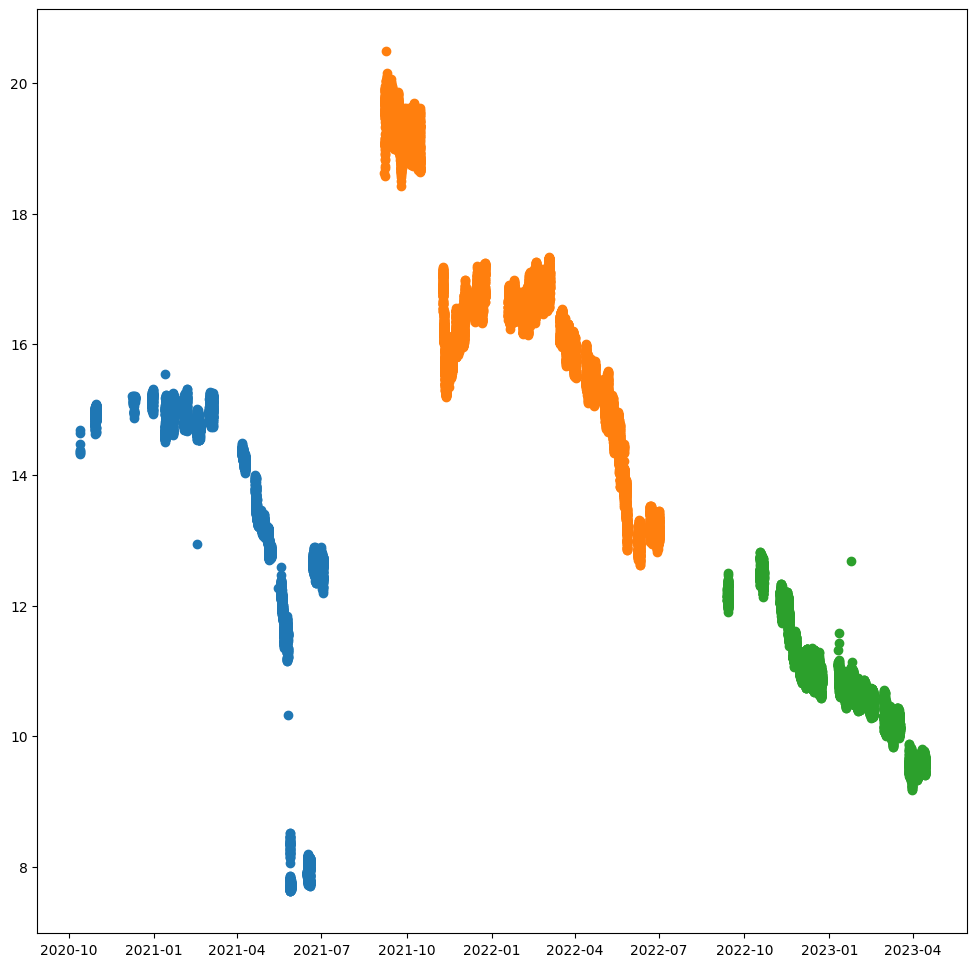

In [14]:
# fitst week on plot refers to fuel cycle #125
# There are no normalizations on 
# dt between hot water of 1st circuit
#* and cold water of 2nd circuit
plt.figure(figsize=(12,12))
plt.scatter(fe12.df.index, fe12.df["QbyIP"])
plt.scatter(fe11.df.index, fe11.df["QbyIP"])
plt.scatter(fe.df.index, fe.df["QbyIP"])



In [15]:
fe.make_heat_dissipation()
fe11.make_heat_dissipation()
fe12.make_heat_dissipation()

/mnt/c/Users/Nikita/Desktop/codes/ML/IRTT_reactor/irtt_cooling_system/app/data_engineering.py:697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df["Ndis"] = self.df["QbyIP"]*self.df["dt2"]/self.df["dt_circuits_coef"]


,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef,I2mean,QbyIP,Ndis
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-12 22:20:00,0,0,0,0.410000,643.100,25.955000,31.005000,18.555000,2.390209,2.301271,...,146.625073,86.975767,95.009957,234,5.050000,4.690000,2.236206,109.536932,14.319705,30.032747
2020-10-12 22:30:00,0,0,0,0.409677,642.425,27.585000,32.680000,19.990000,2.545828,2.450487,...,146.240283,86.982690,95.054686,234,5.095000,4.842500,2.157452,109.425886,14.330467,32.165394
2020-10-12 22:40:00,0,0,0,0.408788,643.475,28.975000,34.085000,21.367500,2.670511,2.570504,...,146.462862,87.399406,95.133483,234,5.110000,4.892500,2.068892,109.665250,14.353726,33.943577
2020-10-12 22:50:00,0,0,0,0.407105,643.225,30.235000,35.335000,22.722500,2.778091,2.670999,...,146.850277,87.554914,95.123581,234,5.100000,4.915000,1.984276,109.842924,14.384147,35.629153
2020-10-12 23:00:00,0,0,0,0.407632,643.600,31.515000,36.590000,24.062500,2.869734,2.761584,...,147.221155,87.540703,95.007309,234,5.075000,4.910000,1.910456,109.923056,14.363472,36.915095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02 23:10:00,1,1,1,0.460000,828.600,52.003226,57.621874,30.674286,4.138511,4.291816,...,0.000000,142.158010,141.429438,134,5.618648,5.256105,2.266955,142.940091,12.601813,29.218247
2021-07-02 23:20:00,1,1,1,0.460000,828.475,52.064515,57.635483,30.783870,4.129356,4.291696,...,0.000000,142.249137,141.509768,134,5.570968,5.219354,2.254511,142.919960,12.601687,29.173806
2021-07-02 23:30:00,1,1,1,0.460000,828.700,52.125806,57.735484,30.881250,4.144813,4.291846,...,0.000000,142.718388,141.999078,134,5.609679,5.218749,2.249800,143.518599,12.552531,29.117486


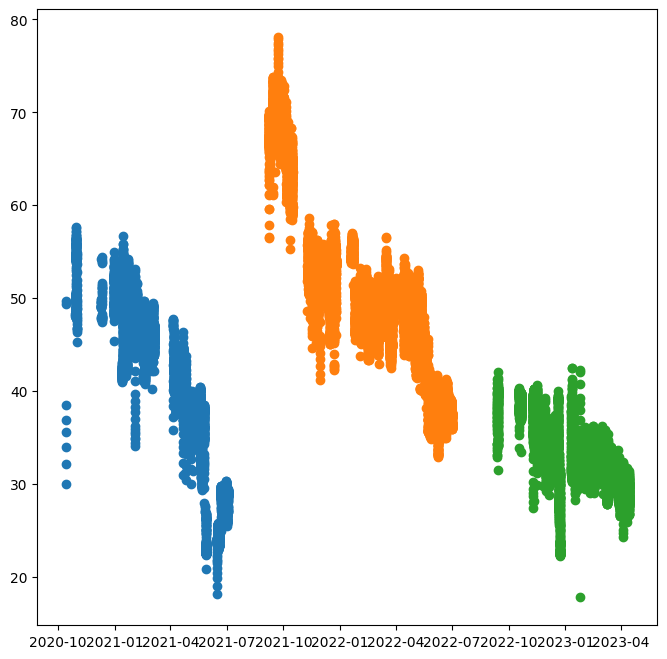

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(fe12.df.index, fe12.df["Ndis"])
plt.scatter(fe11.df.index, fe11.df["Ndis"])
plt.scatter(fe.df.index, fe.df["Ndis"])


# The data above are in range of 14.10.2020-14.04.2023
## Annually few or all HE's were under fouling remove services to increase cooling system efficiency
## Reactor onpower dates are
### [ (2019-08-22, 2020-06-29), (2020-10-12, 2021-07-02), (2021-09-06, 2022-07-01), (2022-09-05, 2023-04-14) ]
## The dates of HE's onpower cycles are
### HE1 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE2 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE3 [ ( 2020-10-12, 2021-06-01 ), ( 2022-03-14, 2023-04-14 ) ]
### HE4 [ ( 2019-10-14, 2021-06-01 ), ( 2021-06-21, 2022-03-14 ), (2022-09-05, 2023-04-14) ]
### HE5 [ ( 2020-06-08, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ) ]

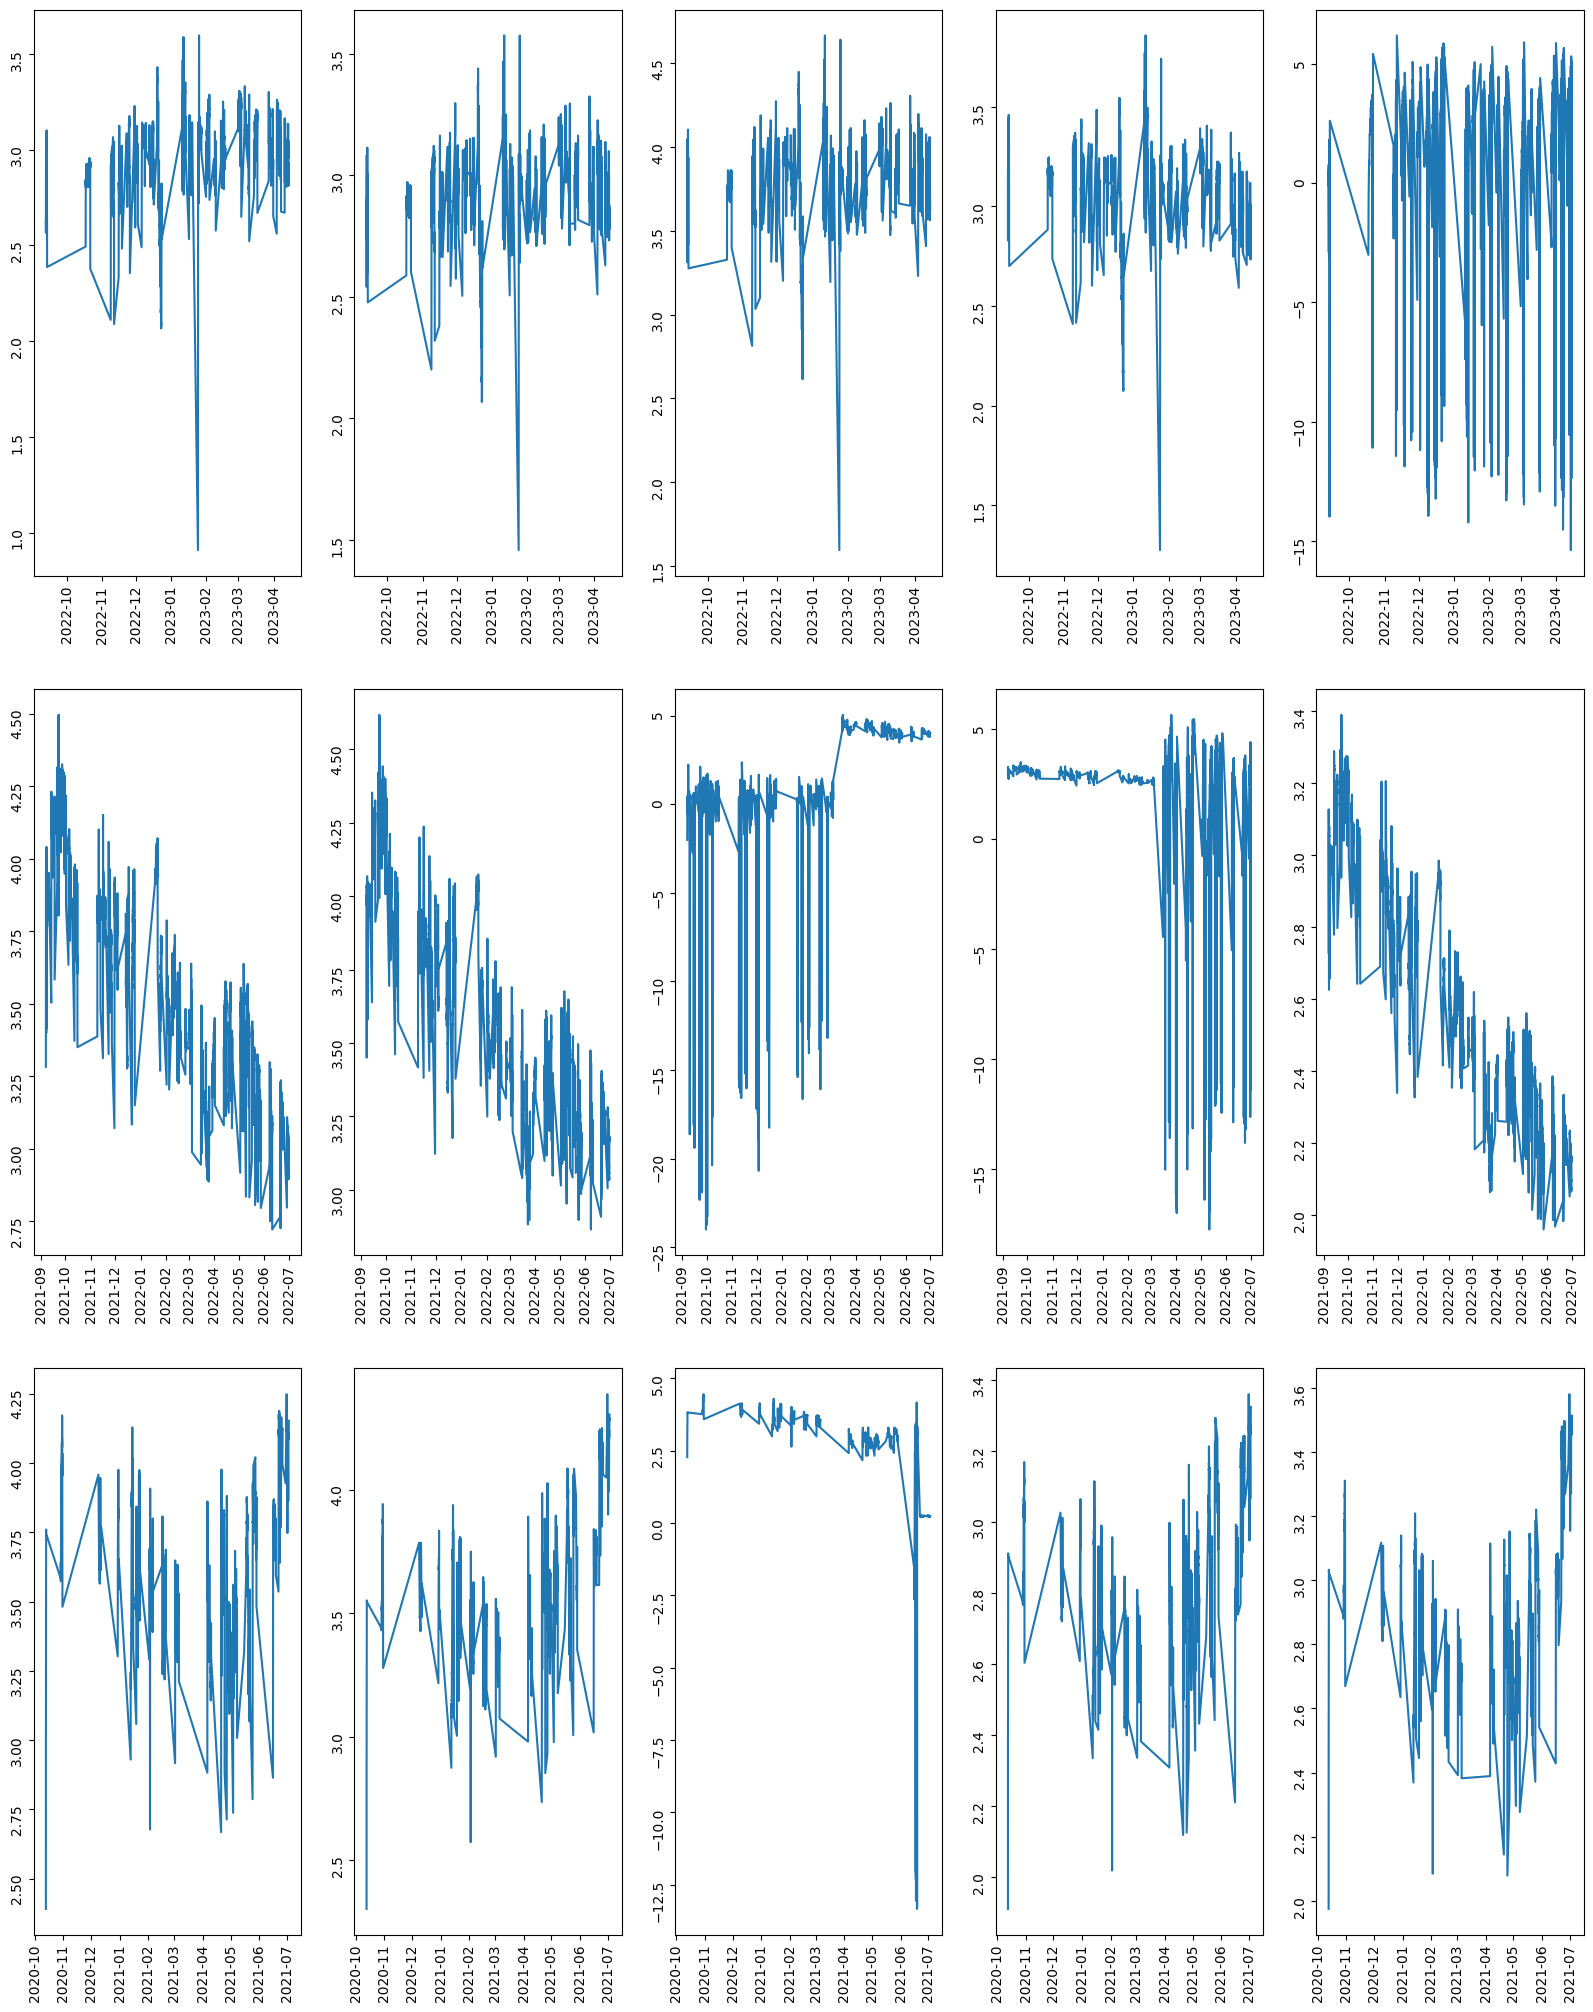

In [17]:
fig, axs = plt.subplots(3,5, figsize=(20,25))

axs[0][0].plot(fe.df.loc["2022":"2023", "T2aHE1"])
axs[0][1].plot(fe.df.loc["2022":"2023", "T2aHE2"])
axs[0][2].plot(fe.df.loc["2022":"2023", "T2aHE3"])
axs[0][3].plot(fe.df.loc["2022":"2023", "T2aHE4"])
axs[0][4].plot(fe.df.loc["2022":"2023", "T2aHE5"])
axs[1][0].plot(fe11.df.loc["2021":"2022", "T2aHE1"])
axs[1][1].plot(fe11.df.loc["2021":"2022", "T2aHE2"])
axs[1][2].plot(fe11.df.loc["2021":"2022", "T2aHE3"])
axs[1][3].plot(fe11.df.loc["2021":"2022", "T2aHE4"])
axs[1][4].plot(fe11.df.loc["2021":"2022", "T2aHE5"])
axs[2][0].plot(fe12.df.loc["2020":"2021", "T2aHE1"])
axs[2][1].plot(fe12.df.loc["2020":"2021", "T2aHE2"])
axs[2][2].plot(fe12.df.loc["2020":"2021", "T2aHE3"])
axs[2][3].plot(fe12.df.loc["2020":"2021", "T2aHE4"])
axs[2][4].plot(fe12.df.loc["2020":"2021", "T2aHE5"])

for i in range(3):
    for j in range(5):
        axs[i][j].tick_params(rotation=90)

In [31]:
fe12.df

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef,I2mean,QbyIP,Ndis
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-12 22:20:00,0,0,0,0.410000,643.100,25.955000,31.005000,18.555000,2.390209,2.301271,...,146.625073,86.975767,95.009957,234,5.050000,4.690000,2.236206,109.536932,14.319705,30.032747
2020-10-12 22:30:00,0,0,0,0.409677,642.425,27.585000,32.680000,19.990000,2.545828,2.450487,...,146.240283,86.982690,95.054686,234,5.095000,4.842500,2.157452,109.425886,14.330467,32.165394
2020-10-12 22:40:00,0,0,0,0.408788,643.475,28.975000,34.085000,21.367500,2.670511,2.570504,...,146.462862,87.399406,95.133483,234,5.110000,4.892500,2.068892,109.665250,14.353726,33.943577
2020-10-12 22:50:00,0,0,0,0.407105,643.225,30.235000,35.335000,22.722500,2.778091,2.670999,...,146.850277,87.554914,95.123581,234,5.100000,4.915000,1.984276,109.842924,14.384147,35.629153
2020-10-12 23:00:00,0,0,0,0.407632,643.600,31.515000,36.590000,24.062500,2.869734,2.761584,...,147.221155,87.540703,95.007309,234,5.075000,4.910000,1.910456,109.923056,14.363472,36.915095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02 23:10:00,1,1,1,0.460000,828.600,52.003226,57.621874,30.674286,4.138511,4.291816,...,0.000000,142.158010,141.429438,134,5.618648,5.256105,2.266955,142.940091,12.601813,29.218247
2021-07-02 23:20:00,1,1,1,0.460000,828.475,52.064515,57.635483,30.783870,4.129356,4.291696,...,0.000000,142.249137,141.509768,134,5.570968,5.219354,2.254511,142.919960,12.601687,29.173806
2021-07-02 23:30:00,1,1,1,0.460000,828.700,52.125806,57.735484,30.881250,4.144813,4.291846,...,0.000000,142.718388,141.999078,134,5.609679,5.218749,2.249800,143.518599,12.552531,29.117486


In [32]:
merged_df = pd.concat([fe12.df, fe11.df, fe.df], axis=0)

In [39]:
fe_merged = FeatureEngineering(merged_df)

In [40]:
fe_merged.df

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p22,p23,p24,pumps2,dt1,dt2,dt_circuits_coef,I2mean,QbyIP,Ndis
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-12 22:20:00,0,0,0,0.410000,643.100000,25.955000,31.005000,18.555000,2.390209,2.301271,...,146.625073,86.975767,95.009957,234,5.050000,4.690000,2.236206,109.536932,14.319705,30.032747
2020-10-12 22:30:00,0,0,0,0.409677,642.425000,27.585000,32.680000,19.990000,2.545828,2.450487,...,146.240283,86.982690,95.054686,234,5.095000,4.842500,2.157452,109.425886,14.330467,32.165394
2020-10-12 22:40:00,0,0,0,0.408788,643.475000,28.975000,34.085000,21.367500,2.670511,2.570504,...,146.462862,87.399406,95.133483,234,5.110000,4.892500,2.068892,109.665250,14.353726,33.943577
2020-10-12 22:50:00,0,0,0,0.407105,643.225000,30.235000,35.335000,22.722500,2.778091,2.670999,...,146.850277,87.554914,95.123581,234,5.100000,4.915000,1.984276,109.842924,14.384147,35.629153
2020-10-12 23:00:00,0,0,0,0.407632,643.600000,31.515000,36.590000,24.062500,2.869734,2.761584,...,147.221155,87.540703,95.007309,234,5.075000,4.910000,1.910456,109.923056,14.363472,36.915095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 10:00:00,0,1,0,0.480000,652.850000,40.234375,46.564515,28.816128,2.855560,2.793018,...,138.279070,139.954891,1.000000,123,6.330140,5.916129,2.033385,140.627198,9.671701,28.139791
2023-04-14 10:10:00,0,1,0,0.480000,652.325000,40.174194,46.500000,28.718750,2.853065,2.796950,...,138.534282,139.858319,1.000000,123,6.325806,5.918750,2.039474,140.747487,9.655664,28.021672
2023-04-14 10:20:00,0,1,0,0.480000,652.975000,40.099998,46.441936,28.650001,2.846378,2.784669,...,138.490940,139.986187,1.000000,123,6.341938,5.900001,2.041404,140.800488,9.661647,27.923786


In [41]:

he1 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he2 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he3 = [("2020-10-12", "2021-06-01"), ("2022-03-14", "2023-04-14")]
he4 = [("2019-10-14", "2021-06-01"), ("2021-06-21", "2022-03-14" ), ("2022-09-05", "2023-04-14")]
he5 = [("2020-06-08", "2021-07-02"), ("2021-09-06", "2022-07-01")]

# there is a bug when start argument is higher than 1000
fe_merged.make_time_onpower_feature(time_periods=he1, feature_name="HE1_TOP")
fe_merged.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"] = fe_merged.df.loc["2019-08-22": "2021-07-02"]+ 2915

fe_merged.make_time_onpower_feature(time_periods=he2, feature_name="HE2_TOP")
fe_merged.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"] = fe_merged.df.loc["2019-08-22": "2021-07-02"]+ 2915

fe_merged.make_time_onpower_feature(time_periods=he3, feature_name="HE3_TOP")


fe_merged.make_time_onpower_feature(time_periods=he4, feature_name="HE4_TOP")

fe_merged.make_time_onpower_feature(time_periods=he5, feature_name="HE5_TOP")


,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,dt2,dt_circuits_coef,I2mean,QbyIP,Ndis,HE1_TOP,HE2_TOP,HE3_TOP,HE4_TOP,HE5_TOP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-12 22:20:00,0,0,0,0.410000,643.100000,25.955000,31.005000,18.555000,2.390209,2.301271,...,4.690000,2.236206,109.536932,14.319705,30.032747,2915.815382,2915.815382,0.863742,0.863742,0.815382
2020-10-12 22:30:00,0,0,0,0.409677,642.425000,27.585000,32.680000,19.990000,2.545828,2.450487,...,4.842500,2.157452,109.425886,14.330467,32.165394,2916.630763,2916.630763,1.727483,1.727483,1.630763
2020-10-12 22:40:00,0,0,0,0.408788,643.475000,28.975000,34.085000,21.367500,2.670511,2.570504,...,4.892500,2.068892,109.665250,14.353726,33.943577,2917.446145,2917.446145,2.591225,2.591225,2.446145
2020-10-12 22:50:00,0,0,0,0.407105,643.225000,30.235000,35.335000,22.722500,2.778091,2.670999,...,4.915000,1.984276,109.842924,14.384147,35.629153,2918.261527,2918.261527,3.454966,3.454966,3.261527
2020-10-12 23:00:00,0,0,0,0.407632,643.600000,31.515000,36.590000,24.062500,2.869734,2.761584,...,4.910000,1.910456,109.923056,14.363472,36.915095,2919.076908,2919.076908,4.318708,4.318708,4.076908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 10:00:00,0,1,0,0.480000,652.850000,40.234375,46.564515,28.816128,2.855560,2.793018,...,5.916129,2.033385,140.627198,9.671701,28.139791,5126.959862,5126.959862,9472.713073,5126.959862,0.000000
2023-04-14 10:10:00,0,1,0,0.480000,652.325000,40.174194,46.500000,28.718750,2.853065,2.796950,...,5.918750,2.039474,140.747487,9.655664,28.021672,5127.511563,5127.511563,9473.326471,5127.511563,0.000000
2023-04-14 10:20:00,0,1,0,0.480000,652.975000,40.099998,46.441936,28.650001,2.846378,2.784669,...,5.900001,2.041404,140.800488,9.661647,27.923786,5128.063264,5128.063264,9473.939870,5128.063264,0.000000


In [43]:
fe_merged.df["HE1_status"] = np.zeros(len(fe_merged.df))
fe_merged.df["HE2_status"] = np.zeros(len(fe_merged.df))
fe_merged.df["HE3_status"] = np.zeros(len(fe_merged.df))
fe_merged.df["HE4_status"] = np.zeros(len(fe_merged.df))
fe_merged.df["HE5_status"] = np.zeros(len(fe_merged.df))

fe_merged.df.loc[:, "HE1_status"][fe_merged.df.loc[:, "HE1_TOP"] != 0] = 1
fe_merged.df.loc[:, "T2aHE1"][fe_merged.df.loc[:, "HE1_TOP"] == 0] = 0

fe_merged.df.loc[:, "HE2_status"][fe_merged.df.loc[:, "HE2_TOP"] != 0] = 1
fe_merged.df.loc[:, "T2aHE2"][fe_merged.df.loc[:, "HE2_TOP"] == 0] = 0

fe_merged.df.loc[:, "HE3_status"][fe_merged.df.loc[:, "HE3_TOP"] != 0] = 1
fe_merged.df.loc[:, "T2aHE3"][fe_merged.df.loc[:, "HE3_TOP"] == 0] = 0

fe_merged.df.loc[:, "HE4_status"][fe_merged.df.loc[:, "HE4_TOP"] != 0] = 1
fe_merged.df.loc[:, "T2aHE4"][fe_merged.df.loc[:, "HE4_TOP"] == 0] = 0

fe_merged.df.loc[:, "HE5_status"][fe_merged.df.loc[:, "HE5_TOP"] != 0] = 1
fe_merged.df.loc[:, "T2aHE5"][fe_merged.df.loc[:, "HE5_TOP"] == 0] = 0


/tmp/ipykernel_23022/4233058668.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe_merged.df.loc[:, "HE1_status"][fe_merged.df.loc[:, "HE1_TOP"] != 0] = 1
/tmp/ipykernel_23022/4233058668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe_merged.df.loc[:, "T2aHE1"][fe_merged.df.loc[:, "HE1_TOP"] == 0] = 0
/tmp/ipykernel_23022/4233058668.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe_merged.df.loc[:, "HE2_status"][fe_mer

In [46]:
fe_merged.df.loc[:, ["T2aHE5", "HE5_status"]]

,T2aHE5,HE5_status
Timestamp,,
2020-10-12 22:20:00,1.974881,1.0
2020-10-12 22:30:00,2.108088,1.0
2020-10-12 22:40:00,2.218043,1.0
2020-10-12 22:50:00,2.306775,1.0
2020-10-12 23:00:00,2.387092,1.0
...,...,...
2023-04-14 10:00:00,0.000000,0.0
2023-04-14 10:10:00,0.000000,0.0
2023-04-14 10:20:00,0.000000,0.0


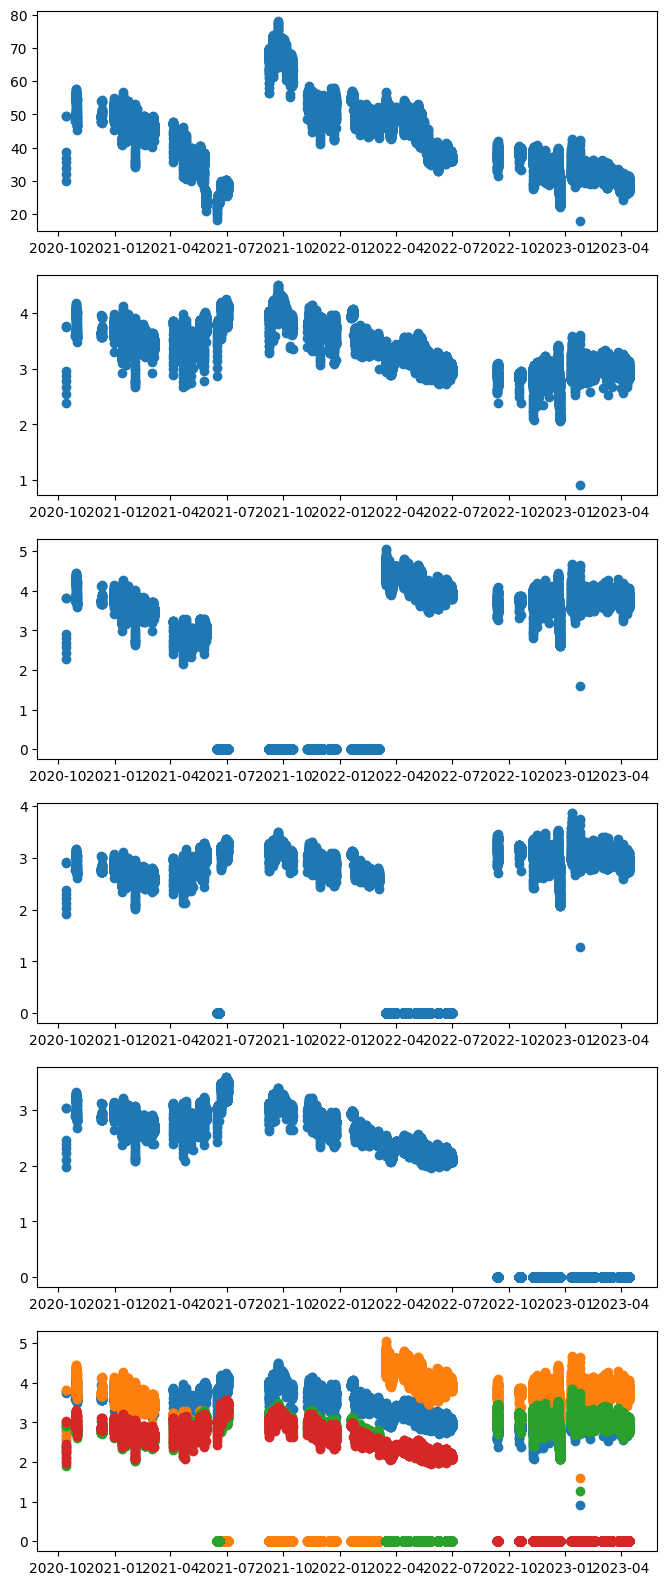

In [63]:
fig, axs = plt.subplots(6,1, figsize=(8,20))
# plt.figure(figsize=(8,8))
axs[0].scatter(fe_merged.df.index, fe_merged.df["Ndis"])
axs[1].scatter(fe_merged.df.index, fe_merged.df["T2aHE1"])
axs[2].scatter(fe_merged.df.index, fe_merged.df["T2aHE3"])
axs[3].scatter(fe_merged.df.index, fe_merged.df["T2aHE4"])
axs[4].scatter(fe_merged.df.index, fe_merged.df["T2aHE5"])

axs[5].scatter(fe_merged.df.index, fe_merged.df["T2aHE1"])
axs[5].scatter(fe_merged.df.index, fe_merged.df["T2aHE3"])
axs[5].scatter(fe_merged.df.index, fe_merged.df["T2aHE4"])
axs[5].scatter(fe_merged.df.index, fe_merged.df["T2aHE5"])

In [43]:
merged_df["FE"] = 1/merged_df.loc[:, "QbyIP_dt_norm"] - 1/merged_df.loc[:, "QbyIP_dt_norm"].iloc[0]

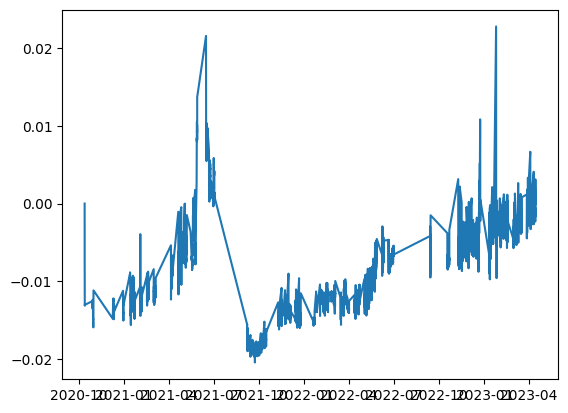

In [44]:
plt.plot(merged_df["FE"])

In [1079]:
import seaborn as sns

In [1080]:
from preprocessing import DataPreprocess

In [1081]:
df_raw = pd.concat(periods_ftrd.values())

In [1082]:
def season_mapping(month: int):
    if month in [12,1,2]:
        return 0
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 1

In [1083]:
def day_period_mapping(hour: int):
    if hour in [21,22,23,0,1,2,3,4,5,6,7,8]:
        return 0
    elif hour in [9,10,11,12,13,14,15,16,17,18,19,20]:
        return 1
#     if hour in [0,1,2,3,4,5]:
#         return 0
#     elif hour in [6,7,8,9,10,11]:
#         return 1
#     elif hour in [12,13,14,15,16,17]:
#         return 2
#     elif hour in [18,19,20,21,22, 23]:
#         return 3

In [1084]:
def sin_transformer(val, period):
    return np.sin(val / period * 2 * np.pi)


def cos_transformer(val, period):
    return np.cos(val / period * 2 * np.pi)

In [1085]:
dp = DataPreprocess()
# timestamp = df_raw.index
df_raw = df_raw.reset_index()
df_raw["season"] = pd.Series(
        list(map(season_mapping, dp.retrieve_datatime(df_raw["Timestamp"], "month")))
    )


# df_raw["hour"] = dp.retrieve_datatime(df_raw["Timestamp"], "hour")

# super low correletaions

# df_raw["day_period"] = pd.Series(
#         list(map(day_period_mapping, dp.retrieve_datatime(df_raw["Timestamp"], "hour")))
#     )
# no correletion with sin/cos transormed labels
# df_raw["hour_sin"] = sin_transformer(h, 24)
# df_raw["hour_cos"] = cos_transformer(h, 24)

In [1086]:
df_raw["FF"] = 1/df_raw["Ndis"] - 1/df_raw["Ndis"].max()

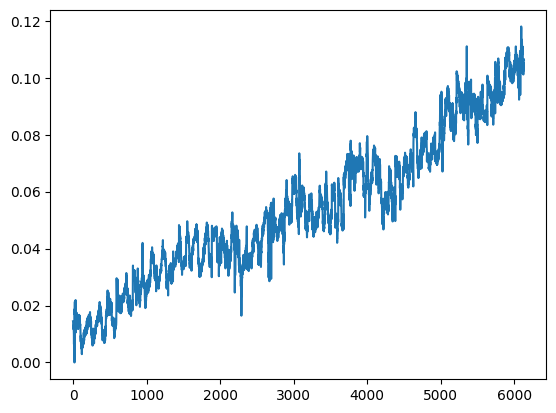

In [1151]:
plt.plot(df_raw["FF"])

In [1087]:
try:
    df_raw = df_raw.drop("Timestamp", axis=1)
except KeyError:
    print("Have Been Dropped Already")
df_raw

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,I2mean,pumps2,QbyIP,QbyI,dt2,dt1,time_on_power,Ndis,season,FF
0,1,0,0,0.454737,759.875000,44.900002,51.200001,35.599998,1.074460,1.098586,...,138.457926,234,12.068803,5.488129,5.632352,6.299999,8.292181,3.201517,1,0.014481
1,1,0,0,0.455000,759.375000,44.878789,51.200001,35.606249,1.077595,1.099527,...,138.446326,234,12.054896,5.484978,5.641733,6.321212,8.611111,3.202682,1,0.014368
2,1,0,0,0.454706,759.050000,44.799999,51.099998,35.590624,1.078619,1.103441,...,138.135273,234,12.084682,5.494976,5.616430,6.299999,9.886831,3.212790,1,0.013385
3,1,0,0,0.454872,758.375000,44.799999,51.099998,35.584374,1.079765,1.102196,...,137.656657,234,12.111496,5.509178,5.613406,6.299999,10.205761,3.217693,1,0.012911
4,1,0,0,0.454722,759.375000,44.760000,51.099998,35.587095,1.080811,1.102177,...,137.597632,234,12.136659,5.518809,5.609953,6.339999,10.524691,3.223337,1,0.012367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,0,1,0,0.480000,652.850000,40.234375,46.564515,28.816128,1.018889,1.041704,...,140.960531,123,9.938295,4.770381,5.916129,6.330140,1522.086907,2.484574,1,0.104613
6127,0,1,0,0.480000,652.325000,40.174194,46.500000,28.718750,1.017186,1.037593,...,141.080820,123,9.921836,4.762481,5.918750,6.325806,1522.273514,2.477843,1,0.105706
6128,0,1,0,0.480000,652.975000,40.099998,46.441936,28.650001,1.015385,1.037886,...,141.133821,123,9.927993,4.765436,5.900001,6.341938,1522.460120,2.472367,1,0.106600
6129,0,1,0,0.480000,652.925000,40.074999,46.400002,28.600000,1.016137,1.035406,...,141.096080,123,9.929888,4.766346,5.903225,6.325003,1522.646727,2.473012,1,0.106494


In [1088]:
df_raw = df_raw.dropna(axis=1)

In [1089]:
df_raw = df_raw.drop(
#     Q2
    ["QbyIP", "T2aHE1", "T2aHE2", "T2aHE3", "T2aHE4", "Treactor", "QbyI", "dt2", "Ndis", "dt1", "T2aHE", "T1aHE"], 
    axis=1,
    errors="ignore"
)

/tmp/ipykernel_1741/795898576.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_raw.corr(), annot=True, fmt=".2f", cmap="YlGnBu")


<AxesSubplot: >

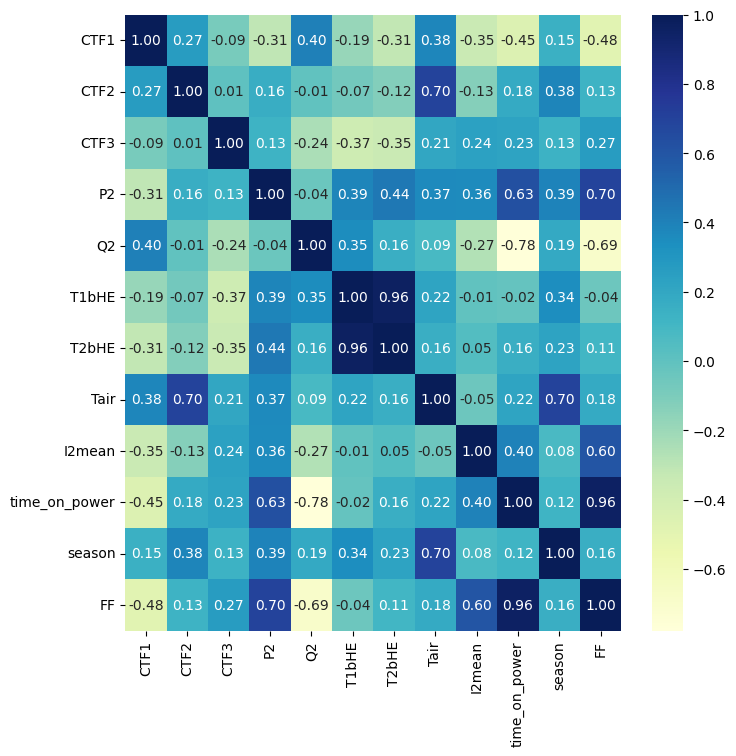

In [1090]:
plt.figure(figsize=(8,8))
sns.heatmap(df_raw.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

# Important note - After 317 (Temperature before HE) was added to other data
## Correletaion between ctf and 317 is observed that means that if 317 rises one of ctf swithces on to stop rising
## 317 has expected correlation with dt2 so it's a good sign
## 317 has expected correlation with season and 327 (Temperature of air)
## 381, 395, 396 has expected correlation with season and dt 

In [1091]:
old_cols = df_raw.columns
new_cols = list(map(lambda x: str(x), old_cols))
dict_new_cols = {}
for n in range(len(old_cols)):
    dict_new_cols[old_cols[n]] = new_cols[n]
    
df_raw = df_raw.rename(columns=dict_new_cols)

In [1092]:
df_raw.columns

Index(['CTF1', 'CTF2', 'CTF3', 'P2', 'Q2', 'T1bHE', 'T2bHE', 'Tair', 'I2mean',
       'pumps2', 'time_on_power', 'season', 'FF'],
      dtype='object')

# Finally only 11 columns left among which are: 
# '317', 327', '381', '395', '396', 'QbyIP', 'dt2', , 'season',
# day_period, "pumps2"
## Aim column is dt2

In [1093]:
df_to_prep = df_raw.copy()
y = df_to_prep["FF"] #.to_numpy().reshape(-1)
X_raw = df_to_prep.drop(["FF"], axis=1)
    
X_raw

,CTF1,CTF2,CTF3,P2,Q2,T1bHE,T2bHE,Tair,I2mean,pumps2,time_on_power,season
0,1,0,0,0.454737,759.875000,51.200001,29.967647,4.966667,138.457926,234,8.292181,1
1,1,0,0,0.455000,759.375000,51.200001,29.964516,4.925000,138.446326,234,8.611111,1
2,1,0,0,0.454706,759.050000,51.099998,29.974193,4.975000,138.135273,234,9.886831,1
3,1,0,0,0.454872,758.375000,51.099998,29.970968,4.950000,137.656657,234,10.205761,1
4,1,0,0,0.454722,759.375000,51.099998,29.977143,4.969444,137.597632,234,10.524691,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6126,0,1,0,0.480000,652.850000,46.564515,22.900000,-5.643590,140.960531,123,1522.086907,1
6127,0,1,0,0.480000,652.325000,46.500000,22.800000,-5.497368,141.080820,123,1522.273514,1
6128,0,1,0,0.480000,652.975000,46.441936,22.750000,-5.145946,141.133821,123,1522.460120,1
6129,0,1,0,0.480000,652.925000,46.400002,22.696775,-5.035897,141.096080,123,1522.646727,1


In [1094]:
X_raw["pumps2"].value_counts()

234    3458
124    1525
123    1148
Name: pumps2, dtype: int64

In [1095]:
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [1096]:
ct = ColumnTransformer(
    [
        ("numerical", StandardScaler(), ["T1bHE", "T2bHE", "Q2", "time_on_power", "Tair", "P2", "I2mean"]),
        ("categorical", OneHotEncoder(), ["pumps2"])
    ],
    remainder = "passthrough"
)

In [1097]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', StandardScaler(),
                                 ['T1bHE', 'T2bHE', 'Q2', 'time_on_power',
                                  'Tair', 'P2', 'I2mean']),
                                ('categorical', OneHotEncoder(), ['pumps2'])])

In [1098]:
# apply column transormer on X
X = ct.fit_transform(X_raw)

In [1099]:
X.shape, y.shape

((6131, 14), (6131,))

/tmp/ipykernel_1741/792006367.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ctct.corr(),


<AxesSubplot: >

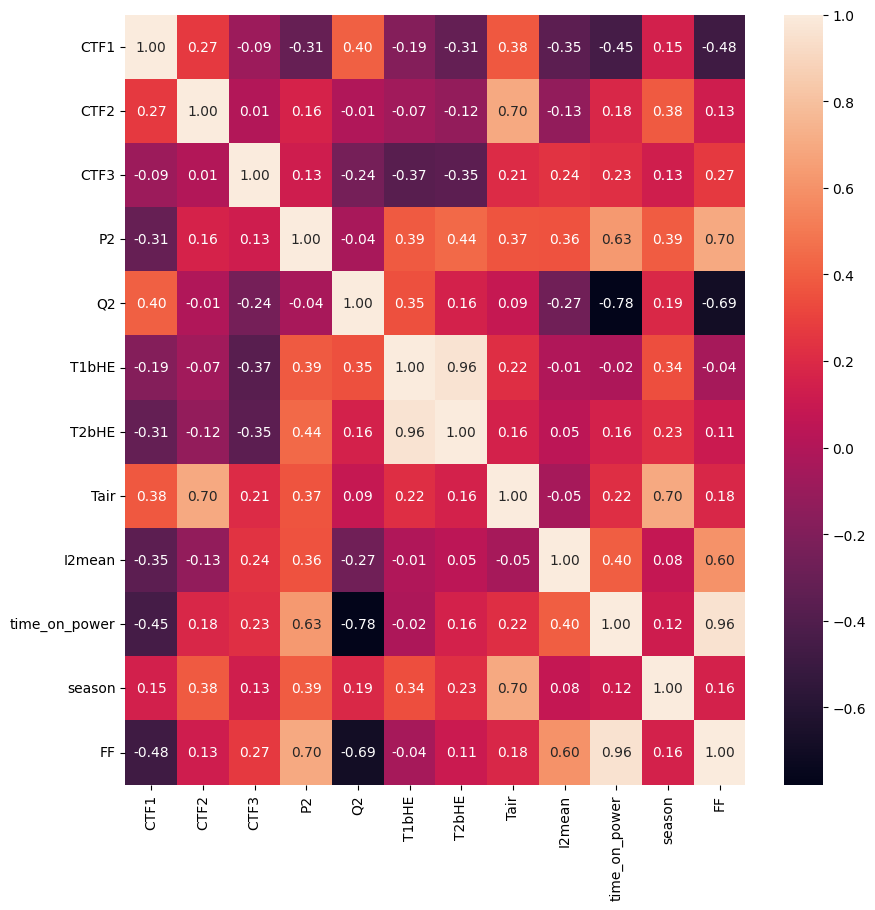

In [1100]:
plt.figure(figsize=(10,10))
ctct = pd.concat(
        [
            X_raw, 
            y
        ], axis=1)
sns.heatmap(
    ctct.corr(),
    annot=True, fmt=".2f")

In [1101]:
y = y.to_numpy()

# Next step is to apply some ML to prepared data

In [1102]:
from sklearn.model_selection import TimeSeriesSplit, ShuffleSplit, KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.neural_network import MLPRegressor


In [1103]:
def evaluate(model, X, y, cv):
#     print(X)
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

In [1104]:
models_list = ["KNeighbors_distance","GBR", "MLP", "GBR", "SGDR"]
models = [
    KNeighborsRegressor(n_neighbors=8, weights = 'distance'),
    GradientBoostingRegressor(learning_rate=0.5, n_estimators=64, max_depth=4),
    MLPRegressor(batch_size=8, hidden_layer_sizes=16, max_iter=500, random_state=42),
    GradientBoostingRegressor(),
    SGDRegressor(max_iter=1000)
 ]

In [1105]:
from model import TrainModel

In [1106]:
X.shape, y.shape

((6131, 14), (6131,))

In [1107]:
tm = TrainModel(X, y)

In [1108]:
kf = list(KFold(n_splits=4).split(X,y))

In [1109]:
tm.model_comparison(models_list, models, kf)

Evaluating of KNeighbors_distance
Mean Absolute Error:     0.014 +/- 0.007
Root Mean Squared Error: 0.017 +/- 0.008

Evaluating of GBR
Mean Absolute Error:     0.007 +/- 0.003
Root Mean Squared Error: 0.008 +/- 0.003

Evaluating of MLP
Mean Absolute Error:     0.089 +/- 0.046
Root Mean Squared Error: 0.108 +/- 0.051

Evaluating of GBR
Mean Absolute Error:     0.009 +/- 0.004
Root Mean Squared Error: 0.011 +/- 0.005

Evaluating of SGDR
Mean Absolute Error:     0.006 +/- 0.006
Root Mean Squared Error: 0.007 +/- 0.007



In [1130]:
gbr = SGDRegressor()

In [1131]:
gbr_preds = []

for tr, te in kf:
    gbr.fit(X[tr], y[tr])
    gbr_preds.append(gbr.predict(X[te]))
    print(gbr.score(X[te], y[te]))
    

0.9201755511346839
0.701051192970817
0.8836358078210856
-1.9832708120230143


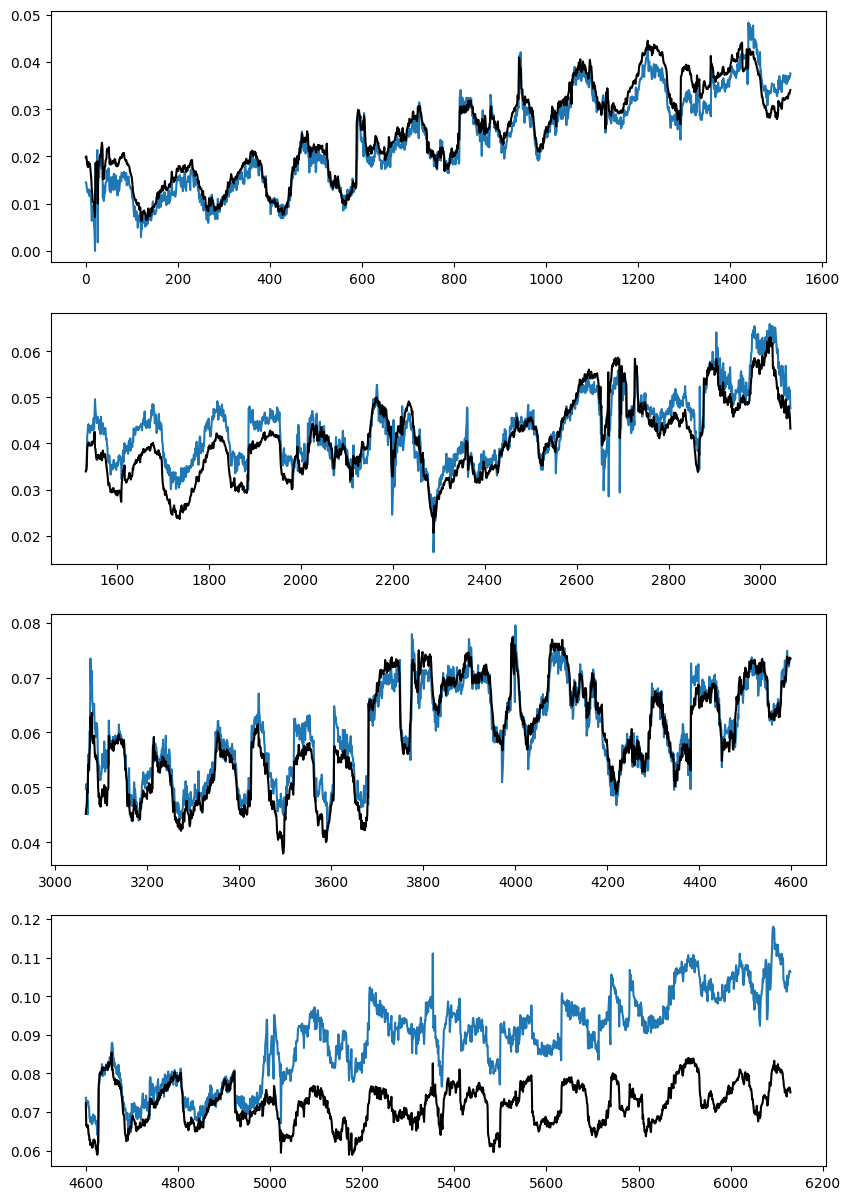

In [1132]:
fig, axs = plt.subplots(len(kf), 1, figsize=(10,15))

for i in range(len(kf)):

    axs[i].plot(kf[i][1], y[kf[i][1]])
    axs[i].plot(kf[i][1], gbr_preds[i], color="black")


# There is high dispersion between to closest point on each step
# SMA teqnique is good approach to add a bit smoothness to a data

In [1133]:
df_raw

,CTF1,CTF2,CTF3,P2,Q2,T1bHE,T2bHE,Tair,I2mean,pumps2,time_on_power,season,FF
0,1,0,0,0.454737,759.875000,51.200001,29.967647,4.966667,138.457926,234,8.292181,1,0.014481
1,1,0,0,0.455000,759.375000,51.200001,29.964516,4.925000,138.446326,234,8.611111,1,0.014368
2,1,0,0,0.454706,759.050000,51.099998,29.974193,4.975000,138.135273,234,9.886831,1,0.013385
3,1,0,0,0.454872,758.375000,51.099998,29.970968,4.950000,137.656657,234,10.205761,1,0.012911
4,1,0,0,0.454722,759.375000,51.099998,29.977143,4.969444,137.597632,234,10.524691,1,0.012367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,0,1,0,0.480000,652.850000,46.564515,22.900000,-5.643590,140.960531,123,1522.086907,1,0.104613
6127,0,1,0,0.480000,652.325000,46.500000,22.800000,-5.497368,141.080820,123,1522.273514,1,0.105706
6128,0,1,0,0.480000,652.975000,46.441936,22.750000,-5.145946,141.133821,123,1522.460120,1,0.106600
6129,0,1,0,0.480000,652.925000,46.400002,22.696775,-5.035897,141.096080,123,1522.646727,1,0.106494


In [1134]:
df_smooth = df_raw.copy()
# Timestamp can be dropped
# df_smooth = df_smooth.reset_index().drop("Timestamp", axis=1)
ct_col = pd.DataFrame([])
ct_col = df_smooth.loc[:, ["CTF1", "CTF2", "CTF3", "season", "pumps2"]]
df_smooth = df_smooth.drop(["CTF1", "CTF2", "CTF3", "season", "pumps2"], axis=1)

In [1135]:
df_smooth

,P2,Q2,T1bHE,T2bHE,Tair,I2mean,time_on_power,FF
0,0.454737,759.875000,51.200001,29.967647,4.966667,138.457926,8.292181,0.014481
1,0.455000,759.375000,51.200001,29.964516,4.925000,138.446326,8.611111,0.014368
2,0.454706,759.050000,51.099998,29.974193,4.975000,138.135273,9.886831,0.013385
3,0.454872,758.375000,51.099998,29.970968,4.950000,137.656657,10.205761,0.012911
4,0.454722,759.375000,51.099998,29.977143,4.969444,137.597632,10.524691,0.012367
...,...,...,...,...,...,...,...,...
6126,0.480000,652.850000,46.564515,22.900000,-5.643590,140.960531,1522.086907,0.104613
6127,0.480000,652.325000,46.500000,22.800000,-5.497368,141.080820,1522.273514,0.105706
6128,0.480000,652.975000,46.441936,22.750000,-5.145946,141.133821,1522.460120,0.106600
6129,0.480000,652.925000,46.400002,22.696775,-5.035897,141.096080,1522.646727,0.106494


In [1136]:
# Simple Moving Average - SMA
# We will take SMA of 10 points

st_ind, fn_ind = 0, 20
arr_smooth = np.array([])

for n in range(len(df_smooth)): # n starts from 0
#     if fn_ind + n == len(df_smooth):
#         break
    arr_smooth = np.append(
        arr_smooth, 
        df_smooth.iloc[st_ind + n: fn_ind + n].mean(axis=0))
    

In [1137]:
arr_smooth = arr_smooth.reshape(len(df_smooth),len(df_smooth.columns))


In [1138]:
df_sma = pd.DataFrame([])
df_sma = pd.concat(
    [
        pd.DataFrame(data=arr_smooth[:-fn_ind], columns=df_smooth.columns),
        ct_col[:-fn_ind]
    ],
    axis=1
)

/tmp/ipykernel_1741/2580512405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_sma.corr(), annot=True, fmt=".2f")


<AxesSubplot: >

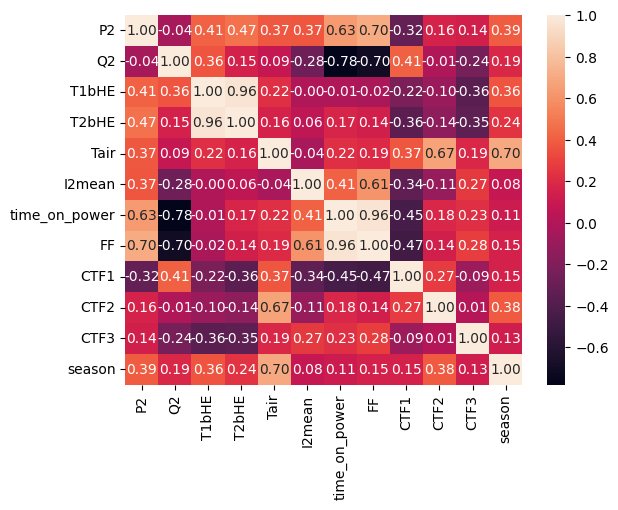

In [1139]:
sns.heatmap(df_sma.corr(), annot=True, fmt=".2f")

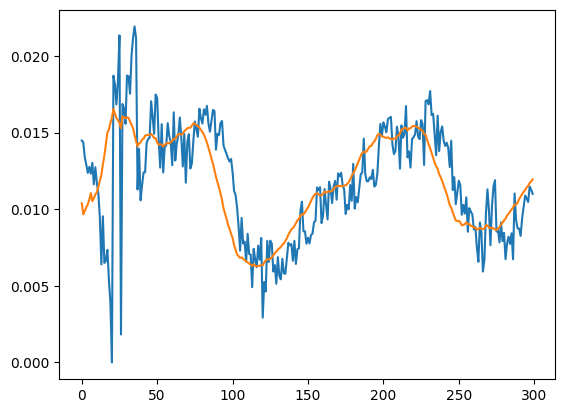

In [1140]:
# comparison before / after SMA 10
plt.plot(np.arange(0,300,1), df_raw["FF"][:300])
plt.plot(np.arange(0,300,1), df_sma["FF"][:300])

# NOW ALL data looks much smooth
## Lets apply preprocessing and try come predictions

In [1126]:
df_to_prep_sma = df_sma.copy()
y_sma = df_sma["FF"] #.to_numpy().reshape(-1)
X_raw_sma = df_sma.drop(["FF"], axis=1)
y_sma, X_raw_sma

(0       0.010394
 1       0.009670
 2       0.009887
 3       0.010124
 4       0.010320
           ...   
 6106    0.106131
 6107    0.105819
 6108    0.105631
 6109    0.105476
 6110    0.105391
 Name: FF, Length: 6111, dtype: float64,
             P2         Q2      T1bHE      T2bHE      Tair      I2mean  \
 0     0.454182  758.02125  51.000616  30.014808  5.845262  136.682364   
 1     0.453991  757.78000  50.985777  30.015854  6.014091  136.457343   
 2     0.454241  757.18000  50.640777  29.634035  6.402713  136.237875   
 3     0.454506  756.62375  50.290777  29.243919  6.767647  136.026873   
 4     0.454717  756.07125  49.930778  28.847188  7.147397  135.830588   
 ...        ...        ...        ...        ...       ...         ...   
 6106  0.480000  653.69250  47.254345  23.814206 -4.683550  142.031828   
 6107  0.480000  653.60875  47.202571  23.735722 -4.814940  141.895088   
 6108  0.480000  653.50750  47.147571  23.655419 -4.923293  141.775612   
 6109  0.480000  653.

In [1127]:
X_sma = ct.transform(X_raw_sma)

In [1128]:
kf_sma = list(KFold(n_splits=4).split(X_sma, y_sma))

In [1129]:
tm.model_comparison(models_list, models, kf_sma)

Evaluating of KNeighbors_distance
Mean Absolute Error:     0.014 +/- 0.007
Root Mean Squared Error: 0.017 +/- 0.008

Evaluating of GBR
Mean Absolute Error:     0.009 +/- 0.004
Root Mean Squared Error: 0.011 +/- 0.004

Evaluating of MLP
Mean Absolute Error:     0.080 +/- 0.040
Root Mean Squared Error: 0.098 +/- 0.046

Evaluating of GBR
Mean Absolute Error:     0.009 +/- 0.004
Root Mean Squared Error: 0.011 +/- 0.005

Evaluating of SGDR
Mean Absolute Error:     0.006 +/- 0.006
Root Mean Squared Error: 0.007 +/- 0.007



In [1141]:
kf = list(KFold(n_splits=4).split(X_sma, y_sma))

In [1142]:
gbr_preds = []

for tr, te in kf:
    gbr.fit(X[tr], y[tr])
    gbr_preds.append(gbr.predict(X[te]))
    print(gbr.score(X[te], y[te]))
    

0.9196815264570622
0.7000569547297815
0.8855739022298427
-1.9727789151559536


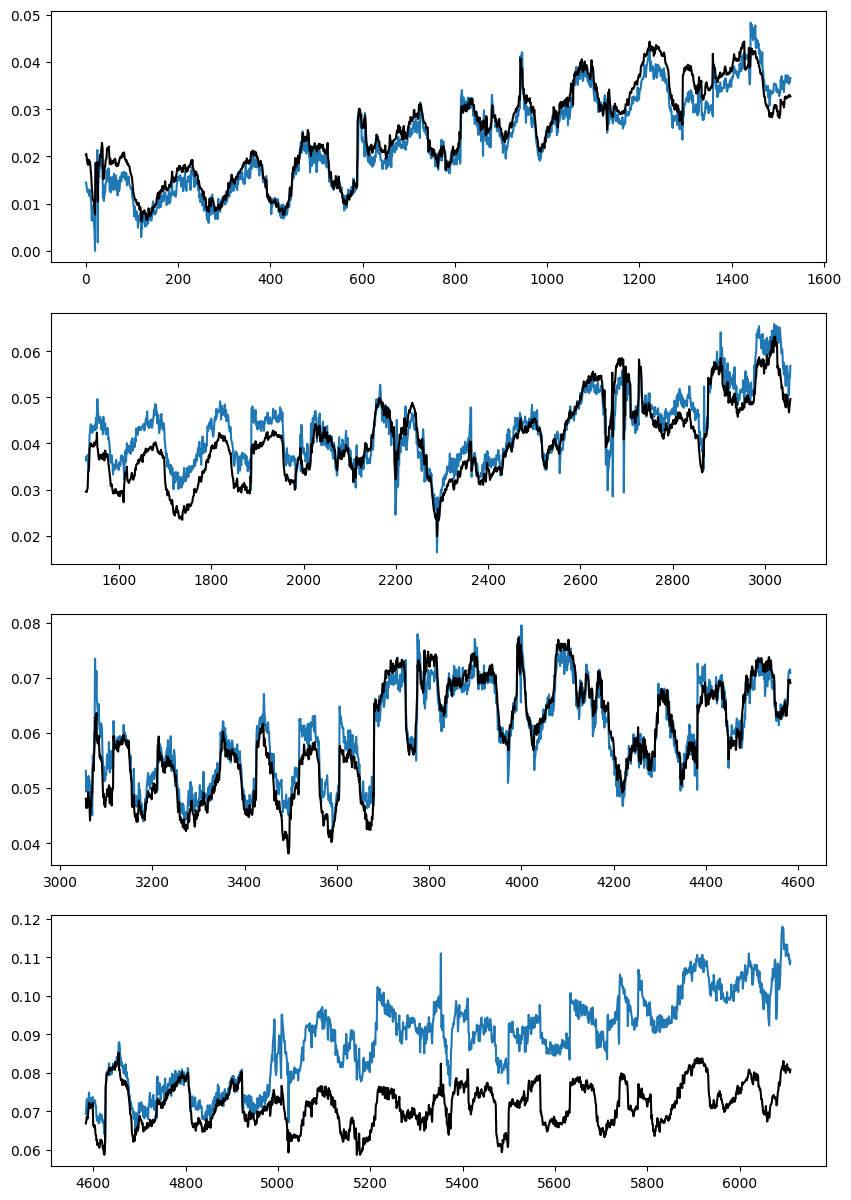

In [1143]:
fig, axs = plt.subplots(len(kf), 1, figsize=(10,15))

for i in range(len(kf)):

    axs[i].plot(kf[i][1], y[kf[i][1]])
    axs[i].plot(kf[i][1], gbr_preds[i], color="black")


# JUST default train_test_split is below
## In this case data shuffles so no time dependensies here

In [1144]:
from sklearn.model_selection import train_test_split

In [1145]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [1146]:
y_tr

array([0.04741574, 0.04837139, 0.05141847, ..., 0.09835796, 0.09070363,
       0.02422848])

In [1147]:
gbr2 = GradientBoostingRegressor()
gbr2.fit(X_tr, y_tr)

GradientBoostingRegressor()

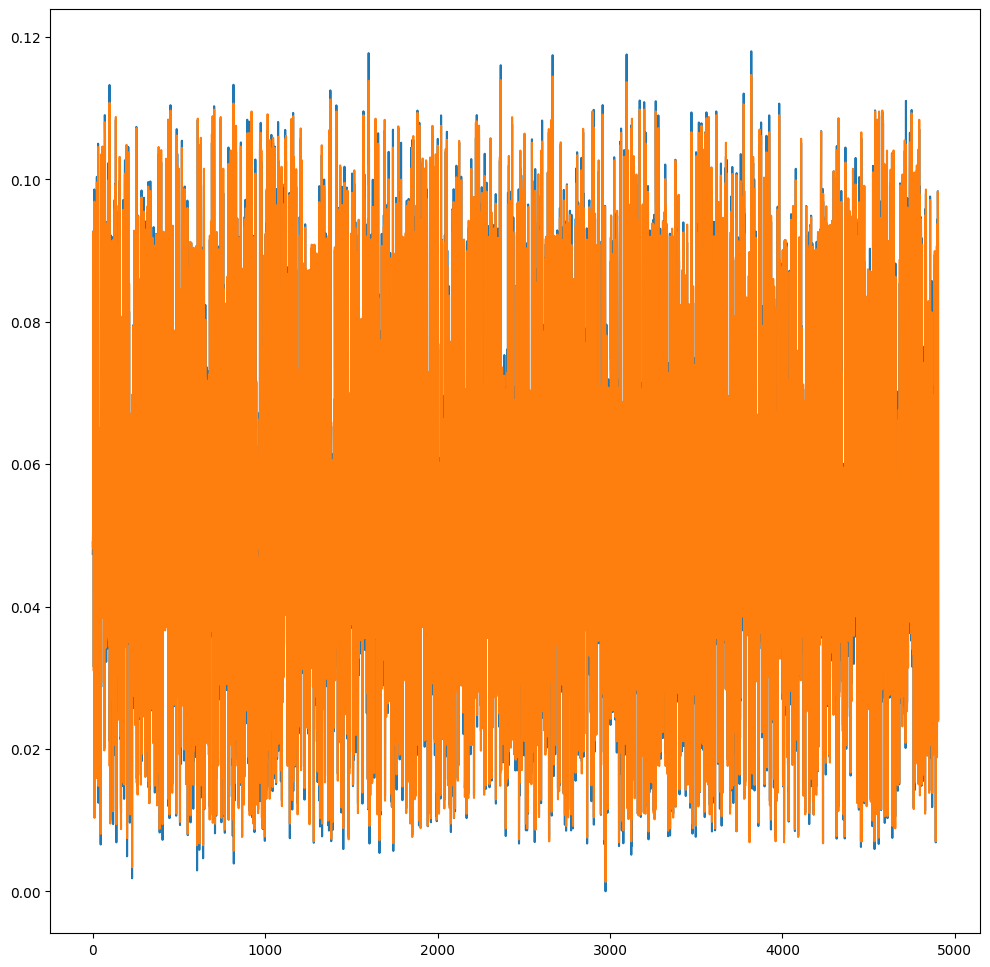

In [1148]:

plt.figure(figsize=(12,12))
plt.plot(y_tr)
plt.plot(gbr2.predict(X_tr))

0.9947796394519224


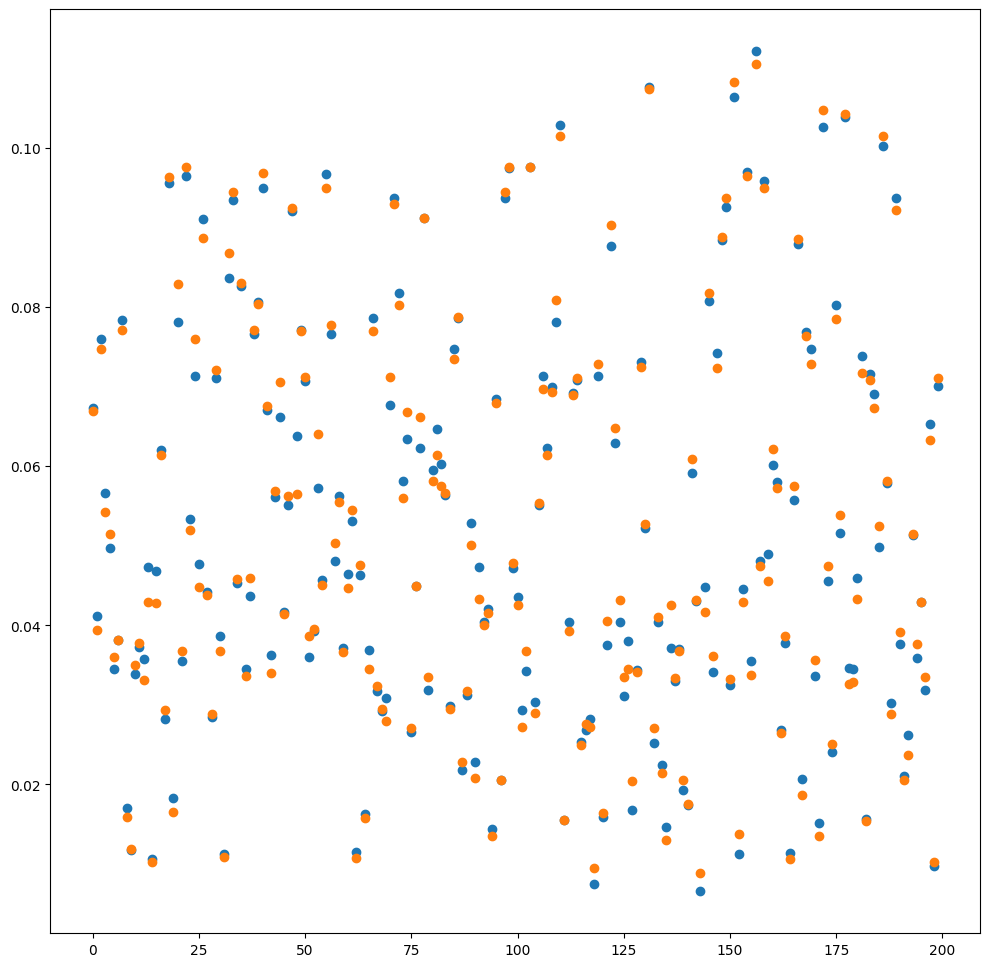

In [1149]:
print(gbr2.score(X_te, y_te))
plt.figure(figsize=(12,12))
xplt = np.arange(0,len(y_te), 1)
plt.scatter(xplt[:200], y_te[:200])
plt.scatter(xplt[:200], gbr2.predict(X_te)[:200])

In [1150]:
df_raw

,CTF1,CTF2,CTF3,P2,Q2,T1bHE,T2bHE,Tair,I2mean,pumps2,time_on_power,season,FF
0,1,0,0,0.454737,759.875000,51.200001,29.967647,4.966667,138.457926,234,8.292181,1,0.014481
1,1,0,0,0.455000,759.375000,51.200001,29.964516,4.925000,138.446326,234,8.611111,1,0.014368
2,1,0,0,0.454706,759.050000,51.099998,29.974193,4.975000,138.135273,234,9.886831,1,0.013385
3,1,0,0,0.454872,758.375000,51.099998,29.970968,4.950000,137.656657,234,10.205761,1,0.012911
4,1,0,0,0.454722,759.375000,51.099998,29.977143,4.969444,137.597632,234,10.524691,1,0.012367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,0,1,0,0.480000,652.850000,46.564515,22.900000,-5.643590,140.960531,123,1522.086907,1,0.104613
6127,0,1,0,0.480000,652.325000,46.500000,22.800000,-5.497368,141.080820,123,1522.273514,1,0.105706
6128,0,1,0,0.480000,652.975000,46.441936,22.750000,-5.145946,141.133821,123,1522.460120,1,0.106600
6129,0,1,0,0.480000,652.925000,46.400002,22.696775,-5.035897,141.096080,123,1522.646727,1,0.106494


In [1014]:
# lets do manual prediction on trained model

X_manual = pd.DataFrame(
    {
        "P2": 0.48,
        "Q2": 650,
        "I2mean": 140,
        "T2bHE": [20],
        "T1bHE": [46],
        "Tair": [-10],
        "CTF1":[0],
        "CTF2":[0],
        "CTF3":[0],
        "pumps2": ["234"],
        "time_on_power": [1000],
        "season": [1],
    }
)
    
X_manual

,P2,Q2,I2mean,T2bHE,T1bHE,Tair,CTF1,CTF2,CTF3,pumps2,time_on_power,season
0,0.48,650,140,20,46,-10,0,0,0,234,1000,1


In [1015]:
X_manual = ct.transform(X_manual)

In [1016]:
gbr2.predict(X_manual)

array([2.68419396])